<img src="../img/logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales
# Semana 7:
#### Nicolás Pereyra
---

## Consigna:
En el repositorio PDStestbench encontrará tres tipos de señales registradas:

- Electrocardiograma (ECG). En el archivo Ppg_TP4.mat encontrará un registro electrocardiográfico (ECG) registrado durante una prueba de esfuerzo, junto con una serie de variables descriptas más abajo.
- Pletismografía (PPG). El archivo PPG.csv contiene una señal registrada en reposo de un estudiante de la materia que ha donado su registro para esta actividad.
- Audio. Tres registros en los que el profesor pronuncia una frase, y otros dos en los que se silba una melodía muy conocida.

Los detalles de cómo acceder a dichos registros los pueden encontrar en lectura_sigs.py

Se pide:

1) Realizar la estimación de la densidad espectral de potencia (PSD) de cada señal mediante alguno de los métodos vistos en clase (Periodograma ventaneado, Welch, Blackman-Tukey).

2) Realice una estimación del ancho de banda de cada señal y presente los resultados en un tabla para facilitar la comparación.

Bonus:
- 💎 Proponga algún tipo de señal que no haya sido analizada y repita el análisis. No olvide explicar su origen y cómo fue digitalizada.

---

##Codigo
### Señalaes utilizadas:

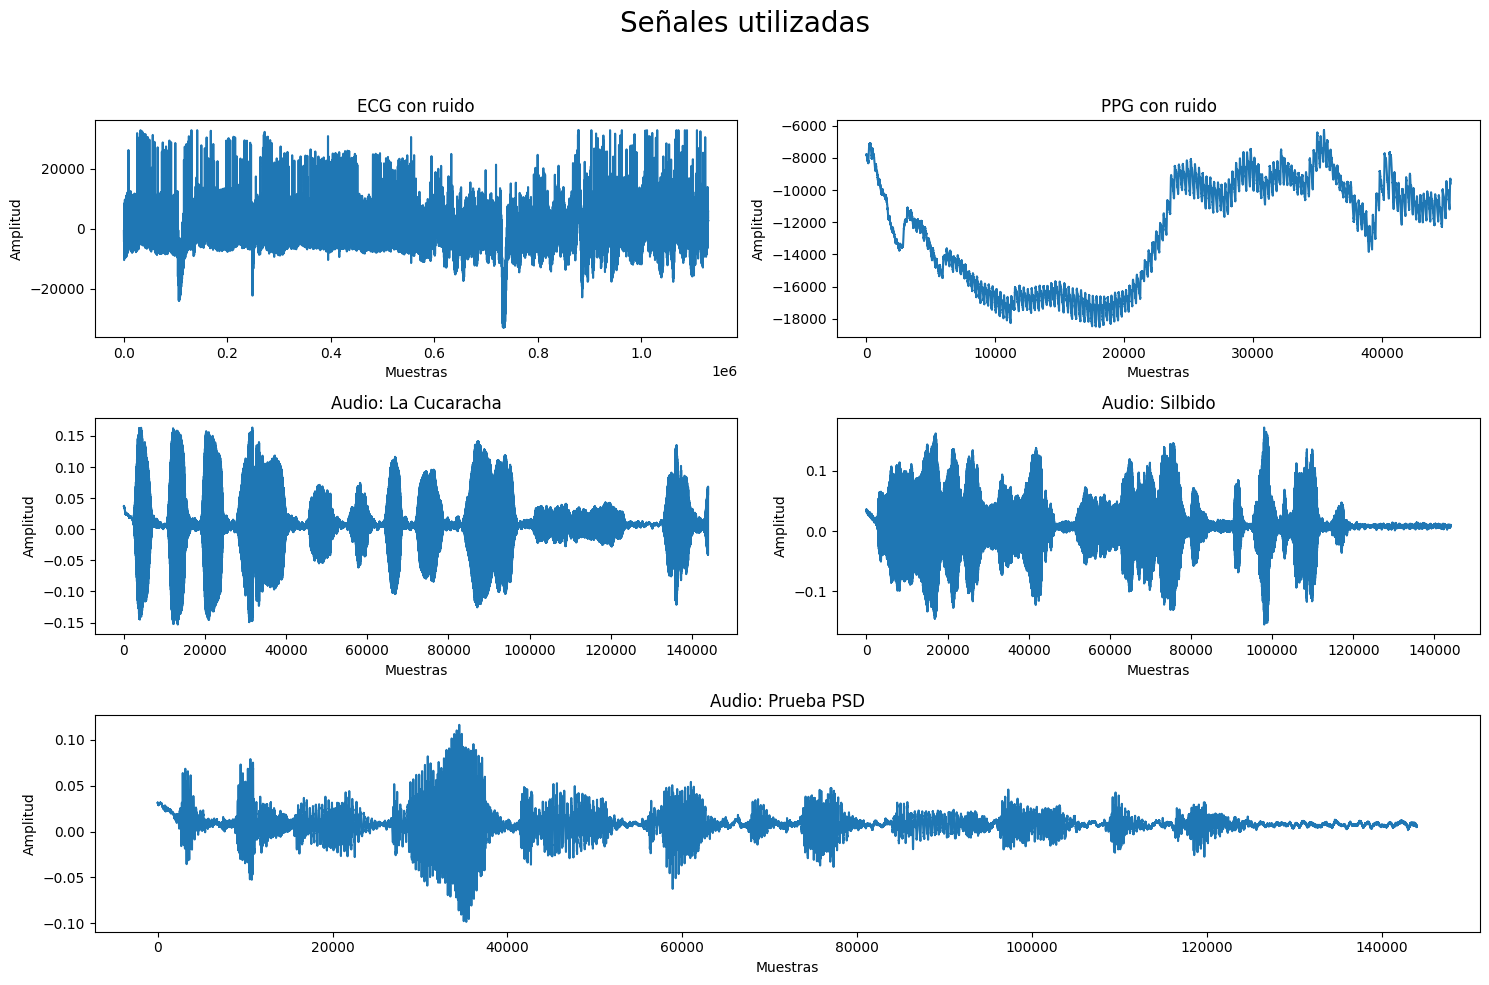

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import scipy.io as sio
import os
from matplotlib import gridspec

def vertical_flaten(mat):
    return mat.flatten() if mat.ndim > 1 else mat

# Crear figura y layout de 3 filas x 2 columnas
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])

# Ruta base
base_path = '../Mariano_lib/pdstestbench-master/'

######################################
# ECG con ruido
######################################
mat_struct = sio.loadmat(os.path.join(base_path, 'ECG_TP4.mat'))
ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])
fs_ecg = 1000  # Frecuencia de muestreo conocida

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(ecg_one_lead)
ax0.set_title("ECG con ruido")
ax0.set_xlabel("Muestras")
ax0.set_ylabel("Amplitud")

######################################
# PPG con ruido
######################################
fs_ppg = 400
ppg = np.genfromtxt(os.path.join(base_path, 'PPG.csv'), delimiter=',', skip_header=1)
ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(ppg)
ax1.set_title("PPG con ruido")
ax1.set_xlabel("Muestras")
ax1.set_ylabel("Amplitud")

######################################
# Audio: La Cucaracha
######################################
fs_audio, wav_cuca = wav.read(os.path.join(base_path, 'la cucaracha.wav'))
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(wav_cuca)
ax2.set_title("Audio: La Cucaracha")
ax2.set_xlabel("Muestras")
ax2.set_ylabel("Amplitud")

######################################
# Audio: Silbido
######################################
fs_audio, wav_silbido = wav.read(os.path.join(base_path, 'silbido.wav'))
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(wav_silbido)
ax3.set_title("Audio: Silbido")
ax3.set_xlabel("Muestras")
ax3.set_ylabel("Amplitud")

######################################
# Audio: Prueba PSD (en toda la fila 3)
######################################
fs_psd, wav_psd = wav.read(os.path.join(base_path, 'prueba psd.wav'))
ax4 = fig.add_subplot(gs[2, :])  # Toda la fila 3
ax4.plot(wav_psd)
ax4.set_title("Audio: Prueba PSD")
ax4.set_xlabel("Muestras")
ax4.set_ylabel("Amplitud")

######################################
# Título general y ajustes
######################################
fig.suptitle("Señales utilizadas", fontsize=20)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


---
## Funciones:


In [185]:
# Importo las funciones desarrolladas para este tp
#from funciones import analizar_ventanas, diseñar_filtrar_plotear
import funciones
import importlib
importlib.reload(funciones)
from funciones import analizar_ventanas, diseñar_filtrar_plotear


## Señal ECG con ruido:
A continuacion se podra observar la densidad de potencia espectral que nos termina dando el metodo de Welch para distintos tipos de ventanas en las cual podremos ver que al variar la ventana utilizada influye nuestra frecuencia pico y el ancho de banda obtenido.

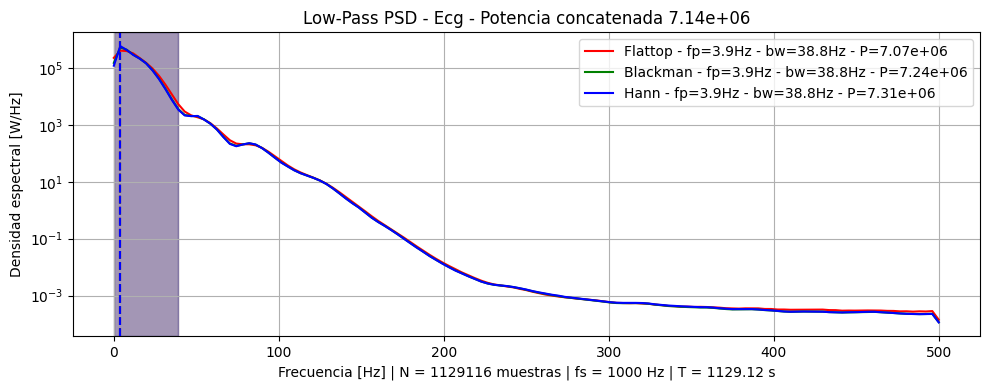

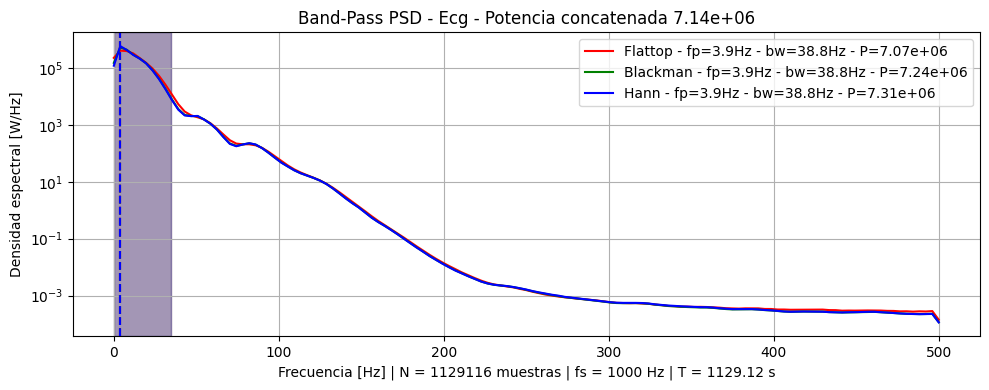

In [104]:
# Pasa bajos
analizar_ventanas(fs=fs_ecg, signal=ecg_one_lead, percentage=0.99, mode='lp', title="Low-Pass PSD - Ecg")

# Pasa banda
analizar_ventanas(fs=fs_ecg, signal=ecg_one_lead, percentage=0.99, mode='bp', title="Band-Pass PSD - Ecg")

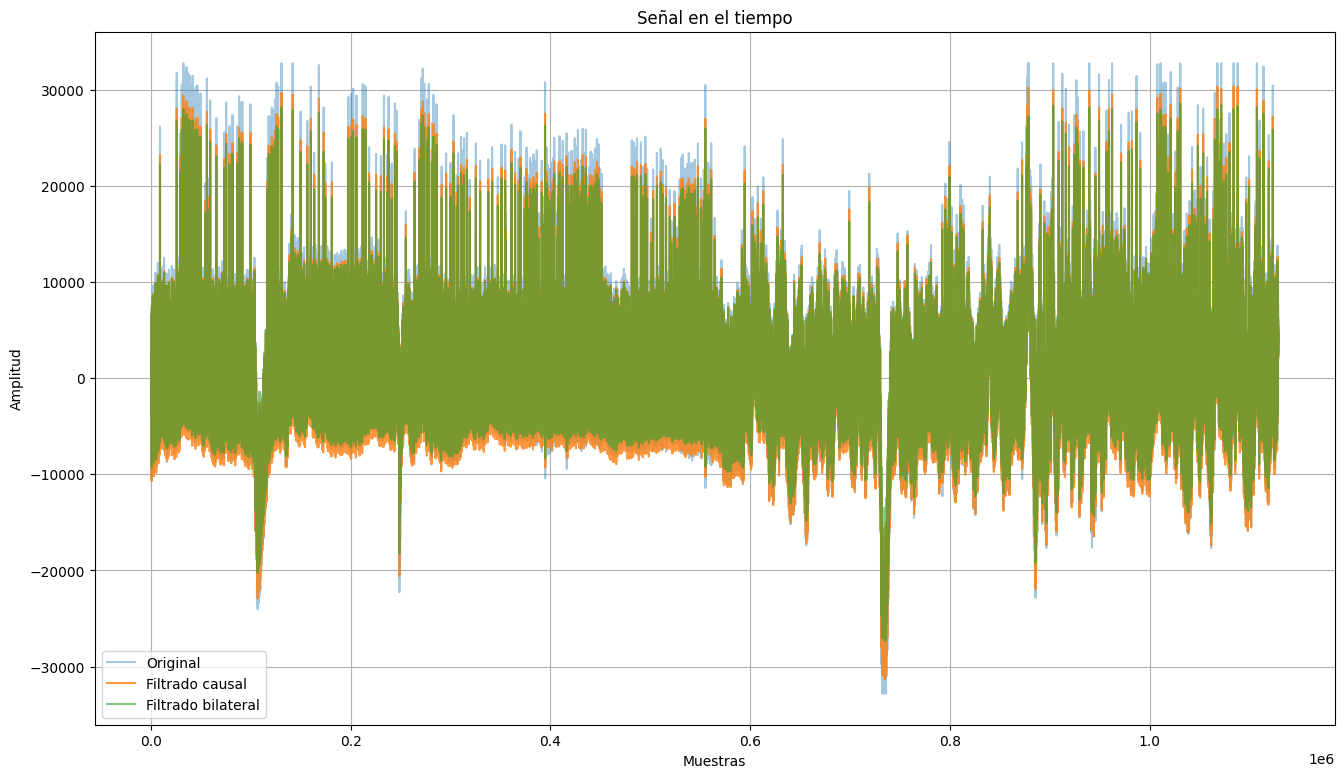

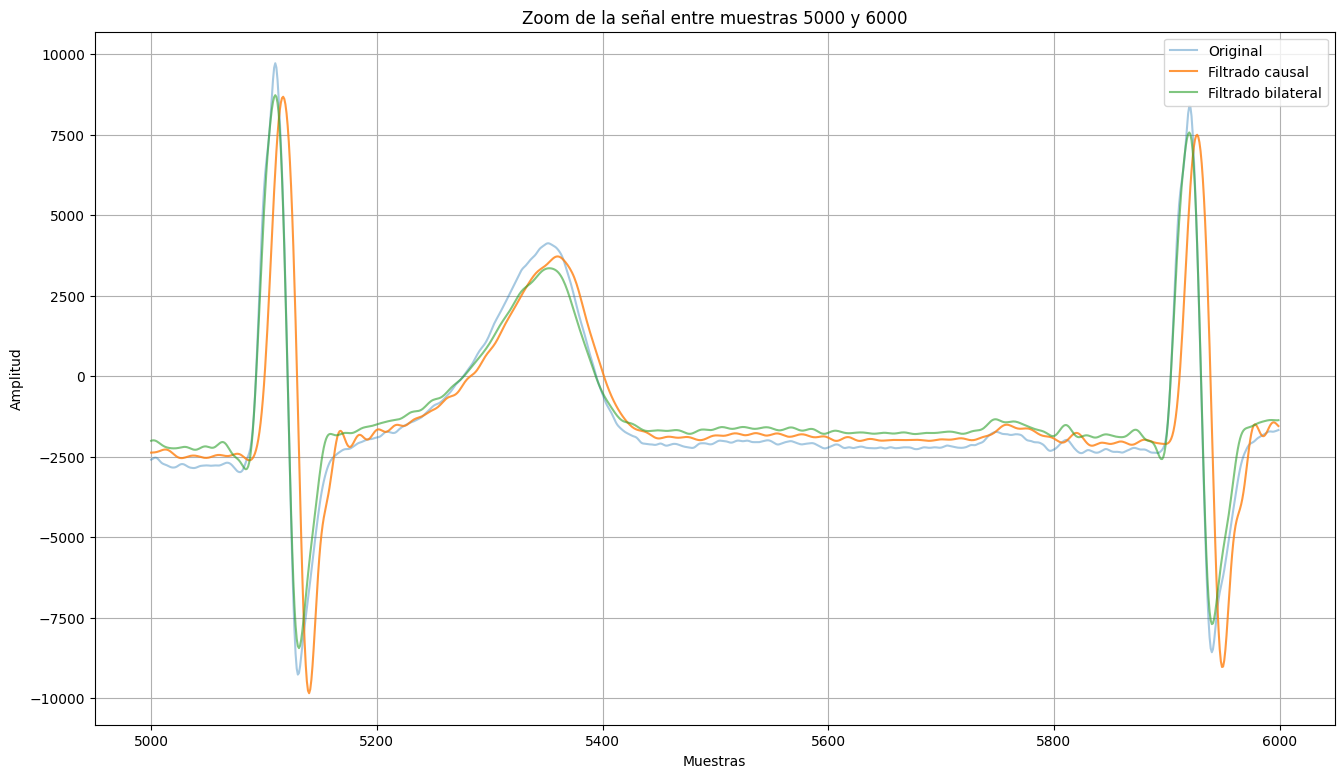

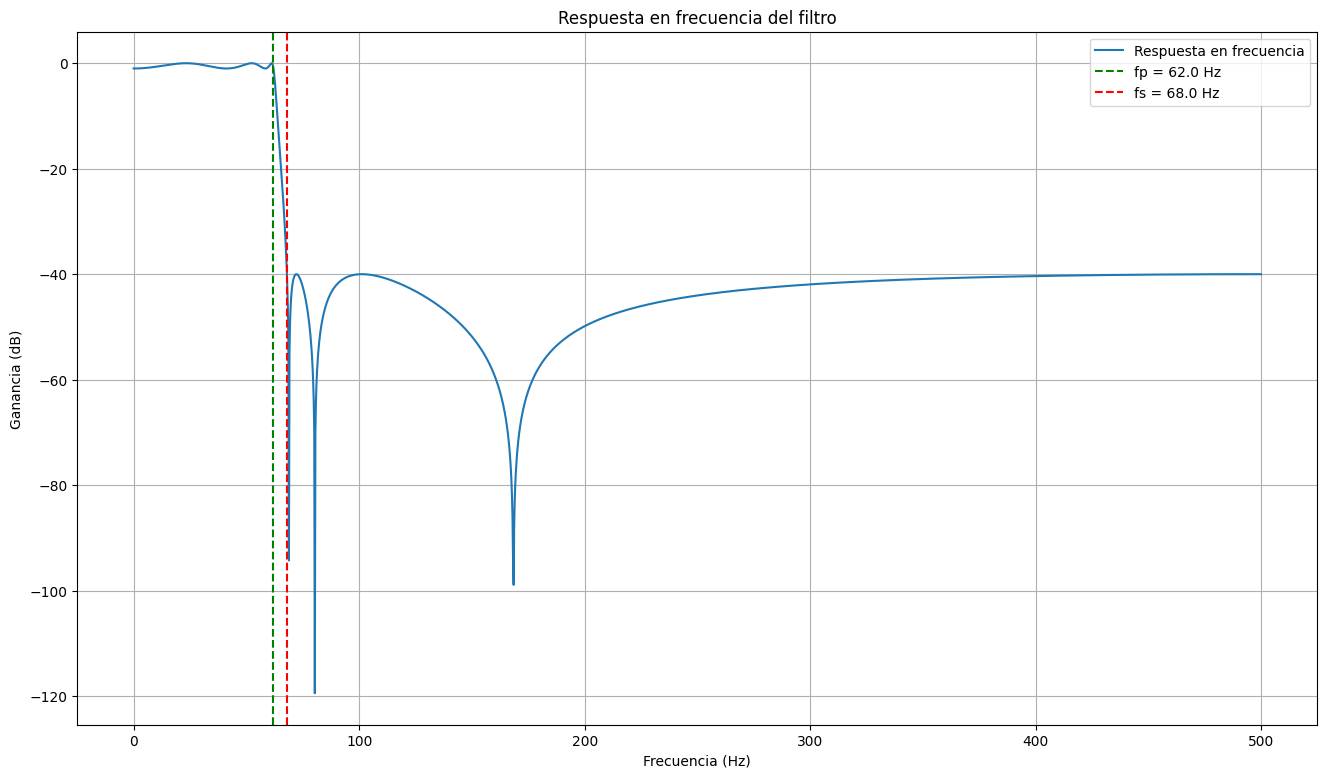

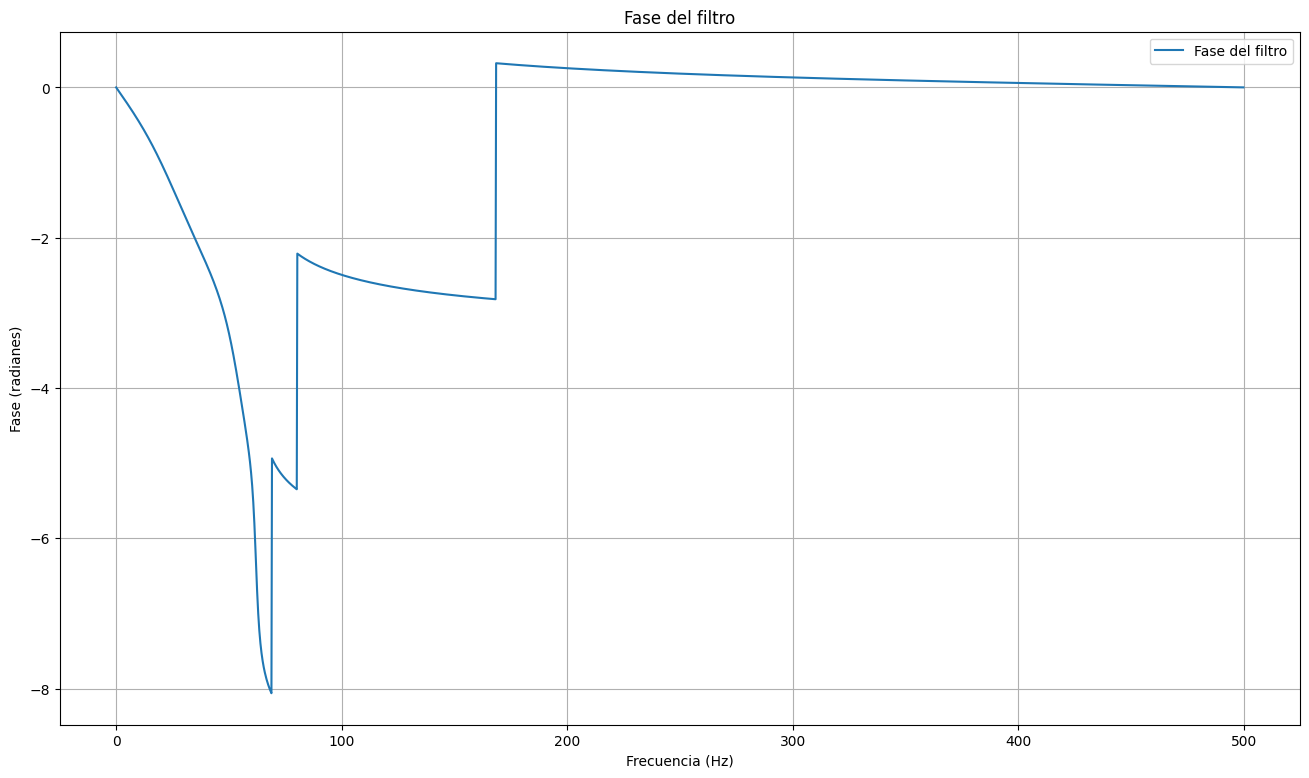

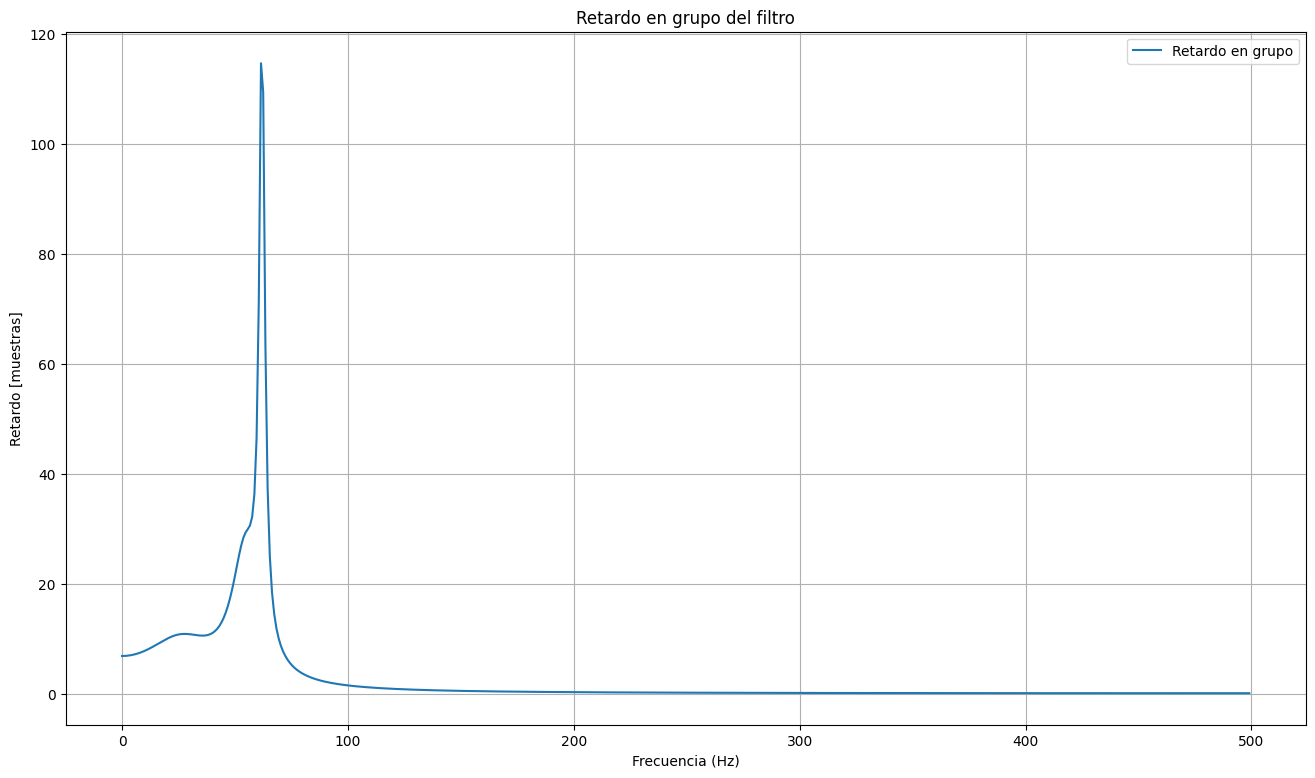

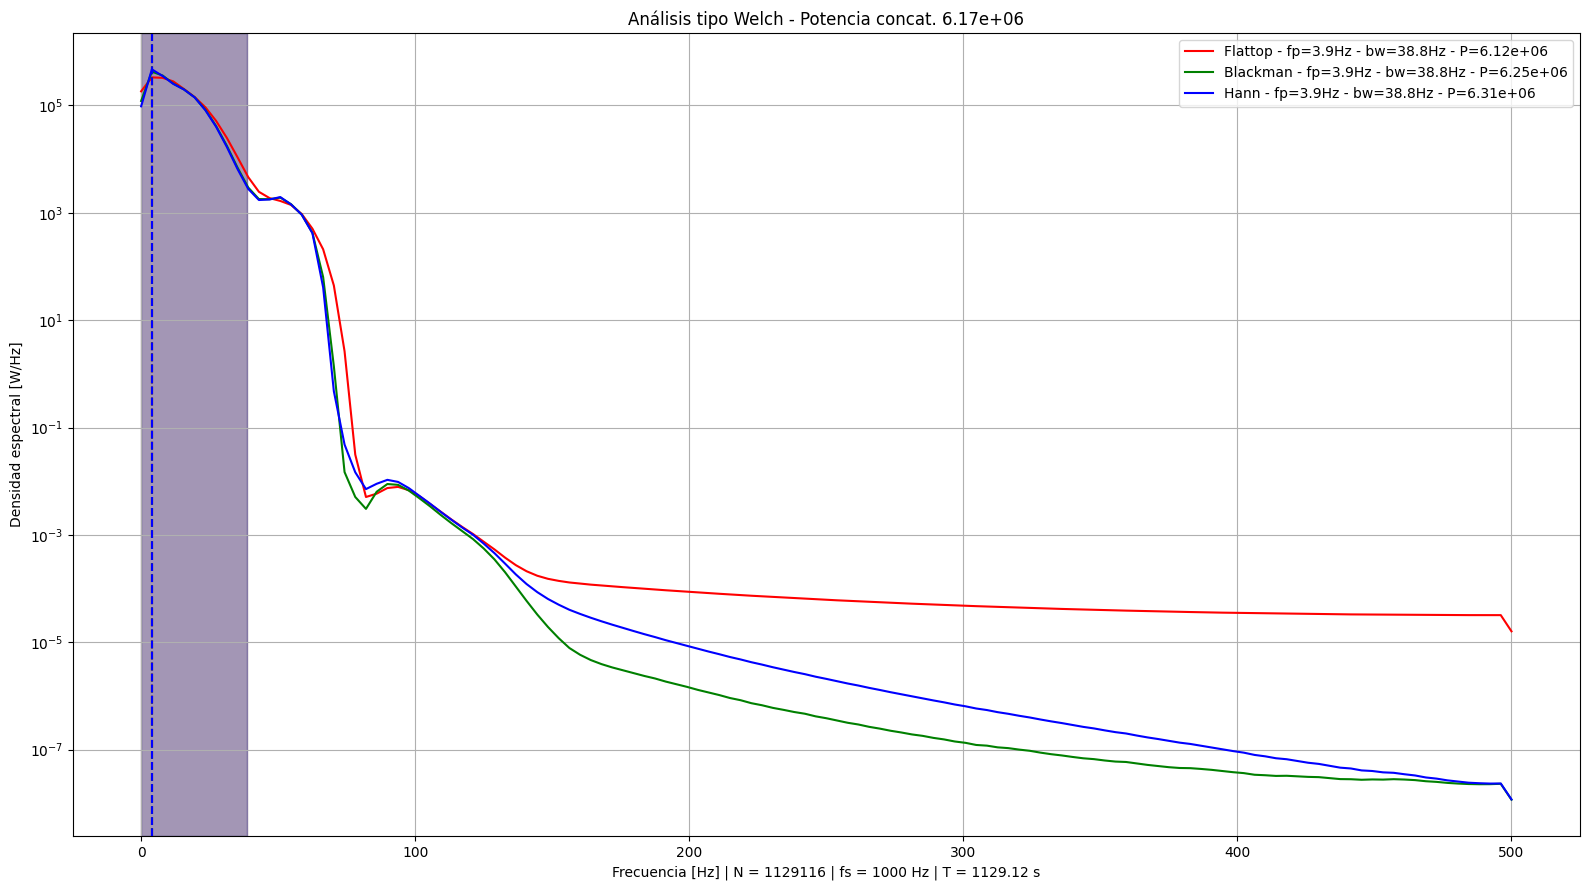

In [107]:
fc_lp_ecg = 50  # Hz (frecuencia de corte para el pasa bajos)
bw_ecg = 12     # Hz (banda de transición)
Ap = 1          # dB
As = 40         # dB
tipo = 'ellip'  # Tipo de filtro

# Llamado para pasa bajos (low-pass)
diseñar_filtrar_plotear(
    fs=fs_ecg,
    bw=bw_ecg,
    Ap=Ap,
    As=As,
    señal=ecg_one_lead,
    tipo=tipo,
    mode='lp',
    fc_min=fc_lp_ecg,  # en modo lp, fc_min actúa como fc
    bi_lateral=True,
    label='ECG_lp',
    zoom=[5000, 6000])

### Resultados:
Como se observa graficamente se logro filtrar correctamente la señal reduciendo el piso de ruido. Tambien se puede ver claramente las diferencias entre un filtrado normal y uno bilateral en el cual se sufra una mayor atenuacion pero no sufra ninguna perturbacion por retardo de fase como se puede observar en el caso del IIR estandar el cual tiene un pico con cierta demora.

A continuacion se mostraran de manera iterativa como suenan las señales luego de aplicarles un filtro. Como se logra apreciar no se escucha nada debido a que la señal es una frecuencia sumamente baja la cual pasa a ser no audible.


<div style="display: flex; justify-content: space-around">
  <div>
    <p>ECG Bilateral LP (Bw de 38Hz): </p>
    <audio controls>
      <source src="señales_filtradas/ECG_lp_filtfilt.wav" type="audio/wav">
    </audio>
  </div>
  <div>
    <p>ECG LP (Bw de 38Hz):</p>
    <audio controls>
      <source src="señales_filtradas/ECG_lp_sosfilt.wav" type="audio/wav">
    </audio>
  </div>
  <div>
    <p>ECG sin filtrar: </p>
    <audio controls>
      <source src="señales_filtradas/ECG.wav" type="audio/wav">
    </audio>ECG
  </div>
</div>


---
### Señal PPG con ruido:
Enn las siguientes señales se puede observar la densidad de potencia obtenida para una señal PPG utilizando distintos tipos de ventanas, como sucedio en el caso anteiror la enegia se encuentra cocentrada en un punto y muy proximo a los 0Hz por lo cual no se encuentra ninguna ventaja entre la utilizacion de un pasa banda y un pasa bajos.

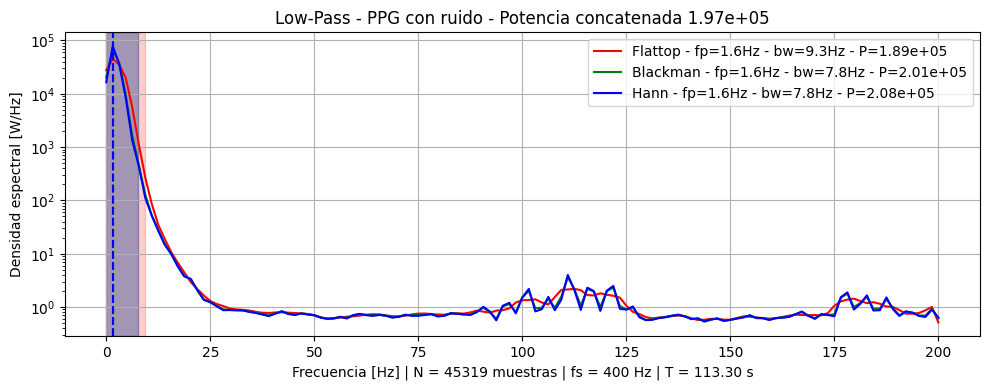

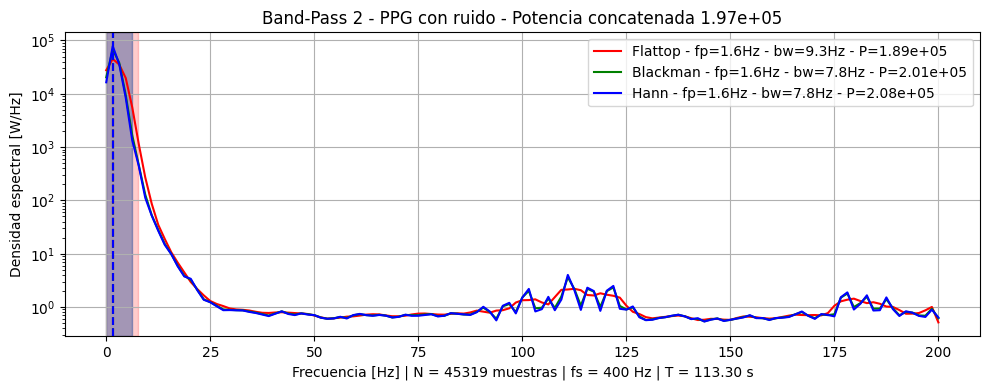

In [133]:
# Pasa bajos
analizar_ventanas(fs=fs_ppg, signal=ppg, percentage=0.99, mode='lp', title="Low-Pass - PPG con ruido")

# Pasa banda
#analizar_ventanas(fs=fs_ppg, signal=ppg, percentage=0.99, mode='bp', title="Band-Pass - PPG con ruido")
analizar_ventanas(fs=fs_ppg, signal=ppg, percentage=0.99, mode='bp', title="Band-Pass 2 - PPG con ruido", f_min=3)



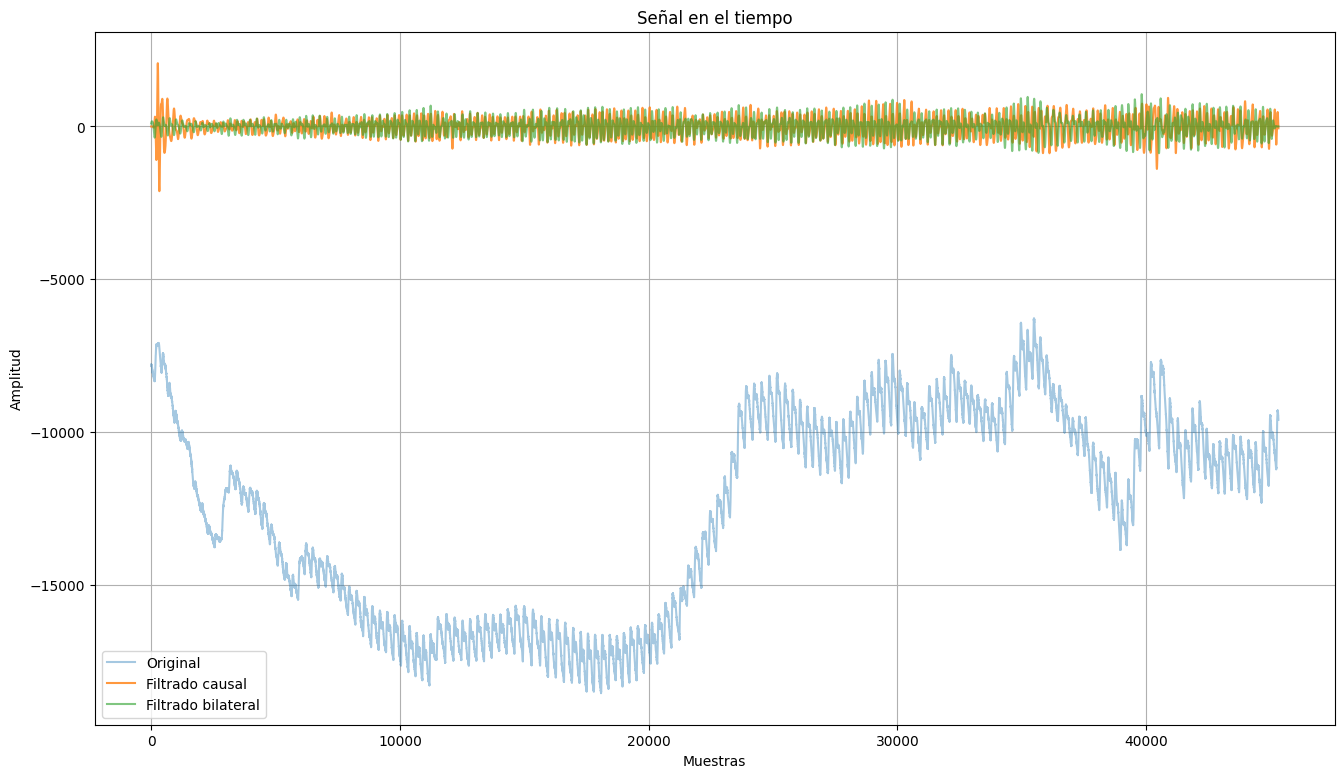

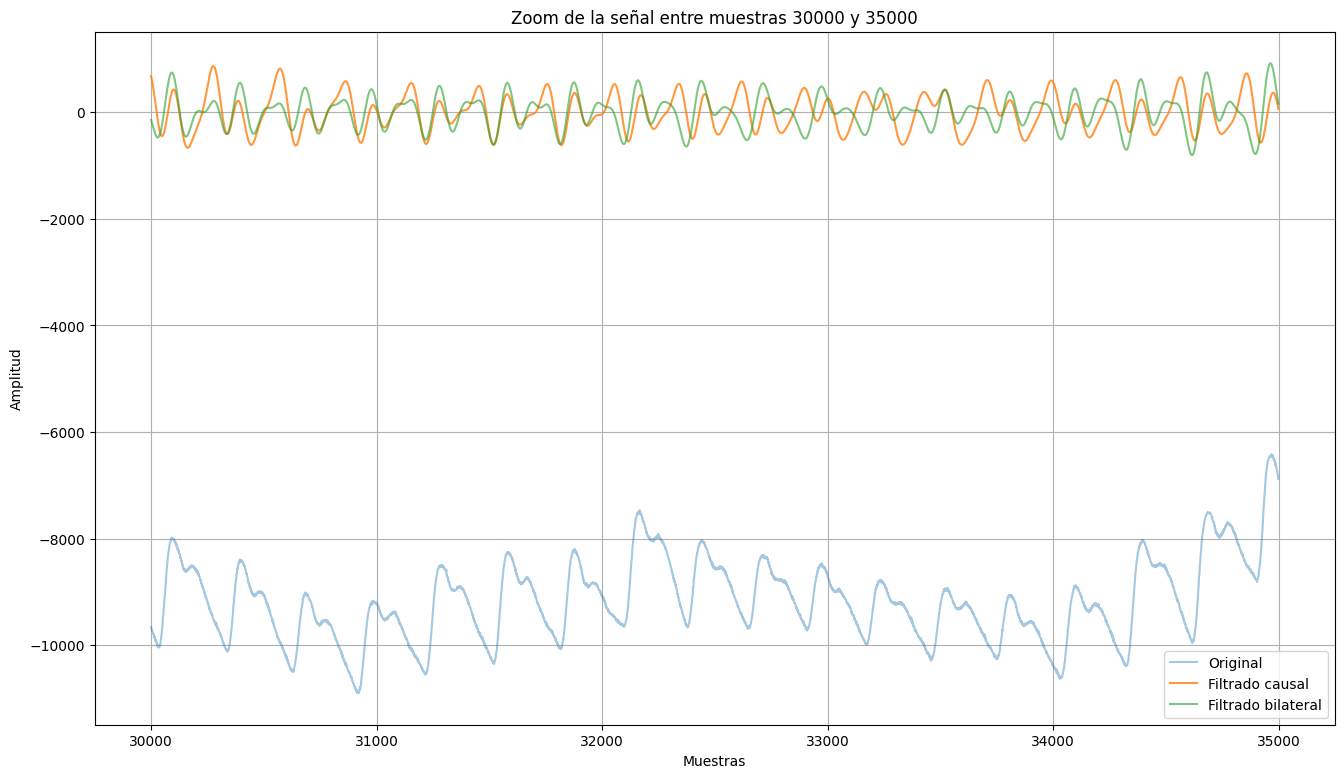

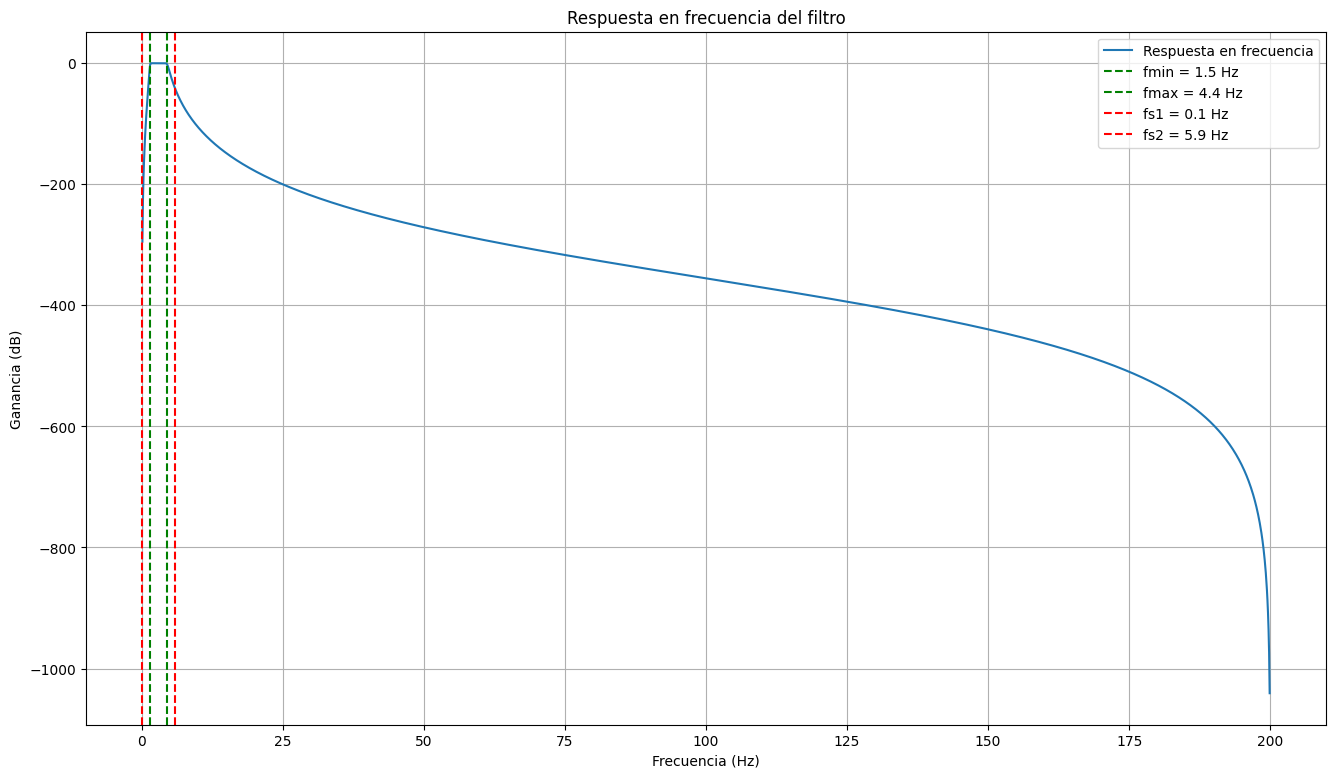

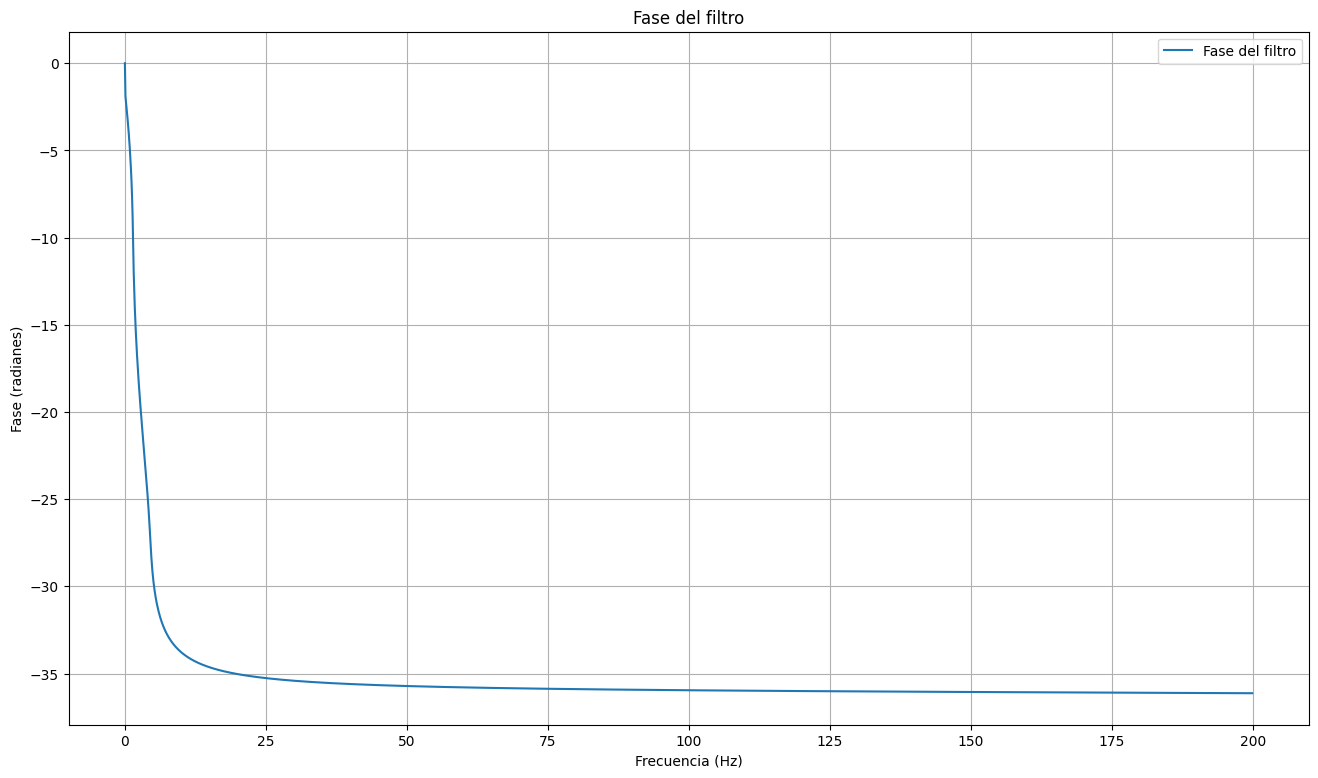

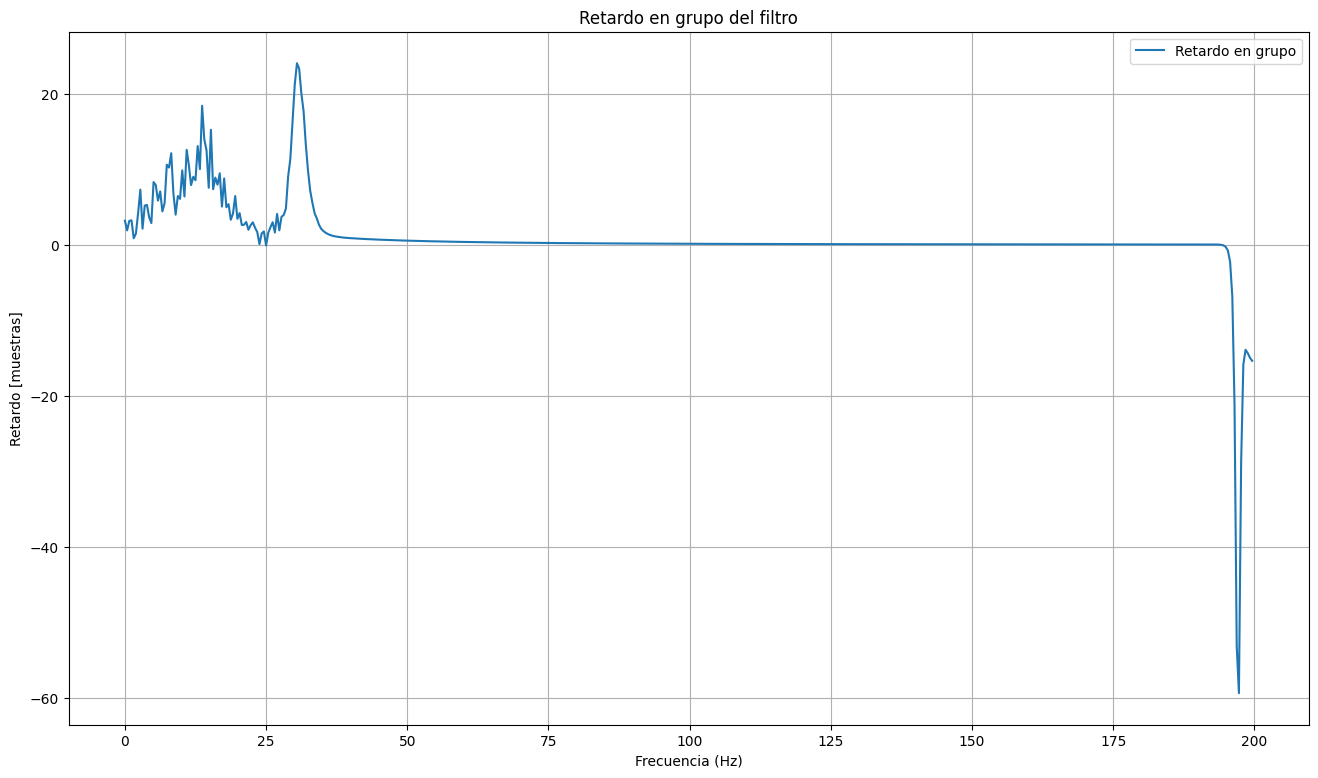

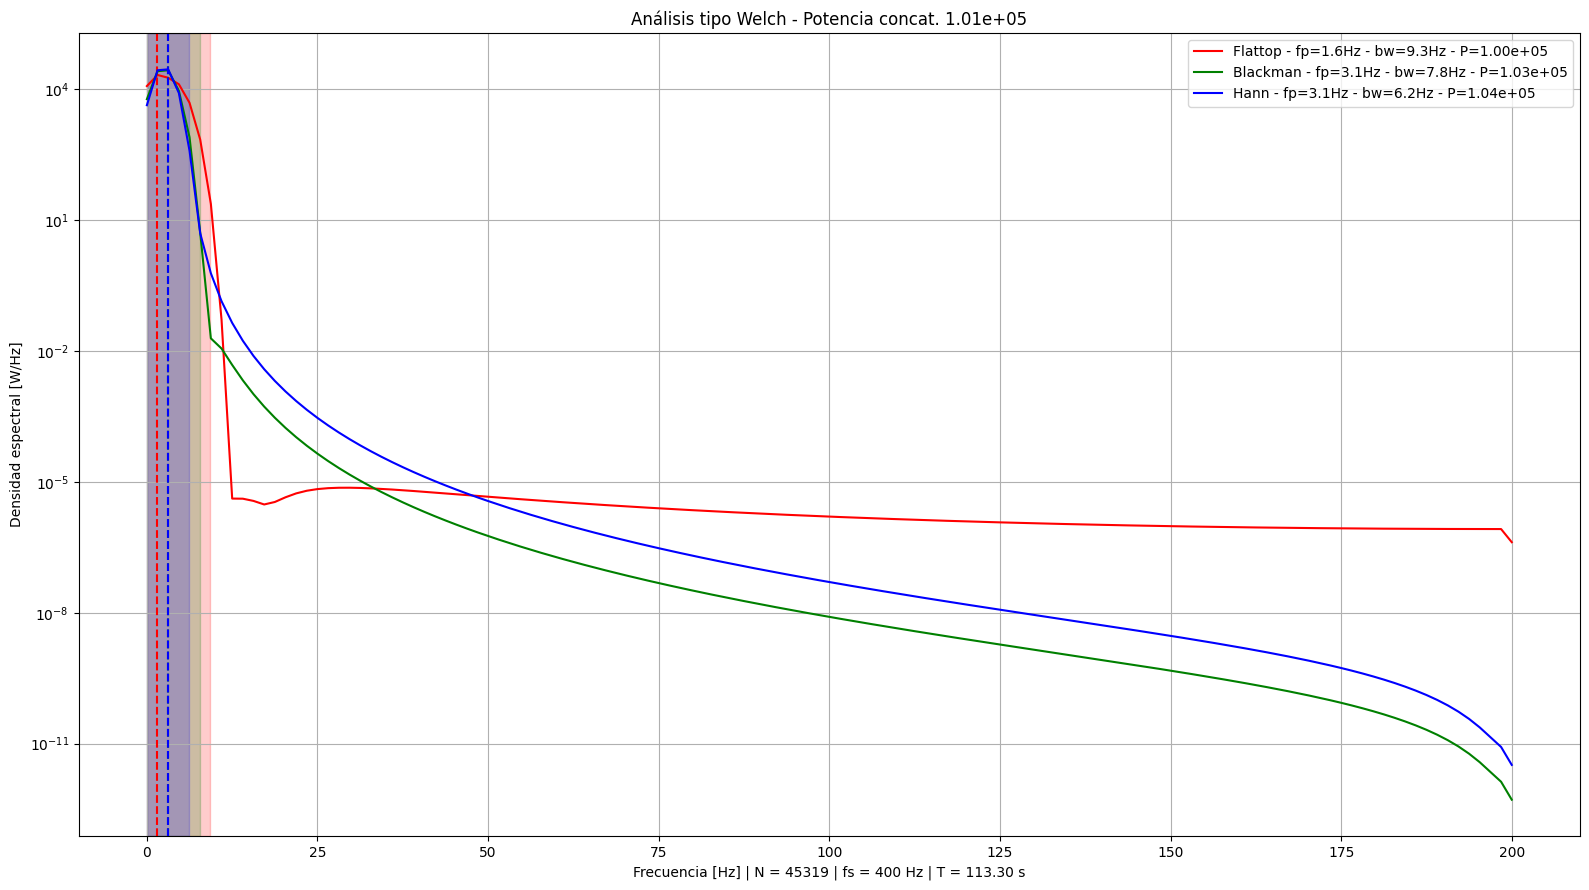

In [145]:
fc_min = 1.5     # Hz
bw_ppg = 2.9        # Hz
Ap = 1             # dB
As = 40            # dB
tipo = 'butter'

# Llamado correcto con la nueva versión de la función que no usa fc

diseñar_filtrar_plotear(
    fs=fs_ppg,
    bw=bw_ppg,
    Ap=Ap,
    As=As,
    señal=ppg,
    tipo=tipo,
    mode='bp',
    fc_min=fc_min,
    bi_lateral=True,
    label="PPG",
    zoom=[30000, 35000])

### Resultados:
En esta coso se volvieron a ver los efectos de la utilizacion del filtro pero en este caso en mayor medida debido a que se tomo la decision de utilizar un pasabanda para atenuar frecuencias bajas lo que nos permitio tener una señal con menos ruido. En este caso las señales vuelven a ser no audibles por ser nuevamente de baja frecuencia.

A continuacion se mostraran de manera iterativa como suenan las señales luego de aplicarles un filtro. Como se logra apreciar no se escucha nada debido a que la señal es una frecuencia sumamente baja la cual pasa a ser no audible.


<div style="display: flex; justify-content: space-around">
  <div>
    <p>PPG Bilateral LP (Bw de 3Hz): </p>
    <audio controls>
      <source src="señales_filtradas/PPG_lp_filtfilt.wav" type="audio/wav">
    </audio>
  </div>
  <div>
    <p>PPG LP (Bw de 3Hz):</p>
    <audio controls>
      <source src="señales_filtradas/PPG_lp_sosfilt.wav" type="audio/wav">
    </audio>
  </div>
  <div>
    <p>PPG Bilateral PB (Bw de 3Hz): </p>
    <audio controls>
      <source src="señales_filtradas/PPG_bp_filtfilt.wav" type="audio/wav">
    </audio>
  </div>
  <div>
    <p>PPG PB (Bw de 3Hz):</p>
    <audio controls>
      <source src="señales_filtradas/PPG_bp_sosfilt.wav" type="audio/wav">
    </audio>
  </div>
</div>


---
### Audio:
En este caso se puede observar la densidad de potencia para uba señal de audio en la cual tiene un mayor sentido el de aplicarle un pasabanda para obtener un ancho de banda menor, en este caso utilizamos dos metodos para su calculo. El primero consta de obtener la frecuencia con mayor densidad de potencia y hacer crecer el ancho de banda de manera simetrica hasta concatenar la potencia pedida, por otro lado el segundo metodo consta de fijar una frecuencia minima y obtener la frecuencia maxima para la cual se concatene la potencia pedida.
El meotod que nos proporciono el menor ancho de banda fue el primer pasa banda y el cual nos proporciono un ancho de banda 22% meno que utilizando el metodo de pasa bajos. A su vez el segundo metodo de pasa banda mejoro los resultados del pasa bajos pero debido a la fijasion a ojo de una frecuencia minima no se logro un muy buen desempeño.


----
##### Cucharacha:


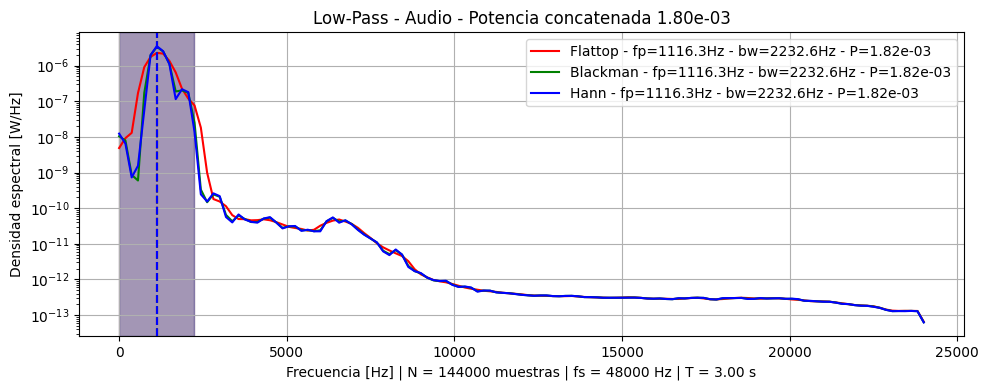

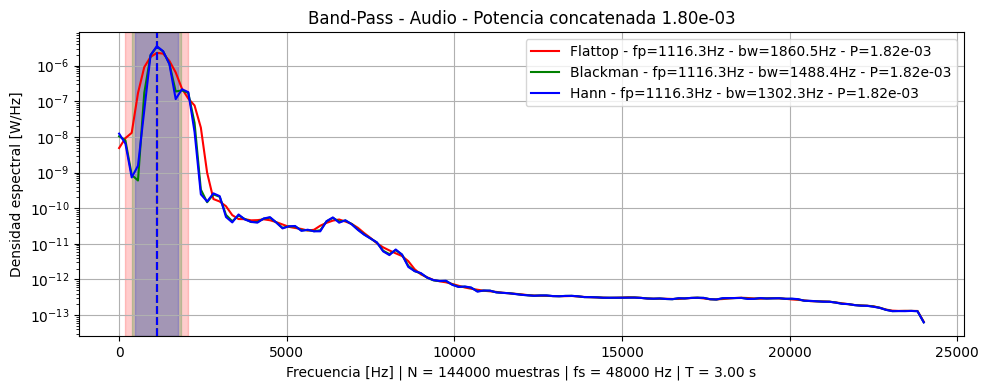

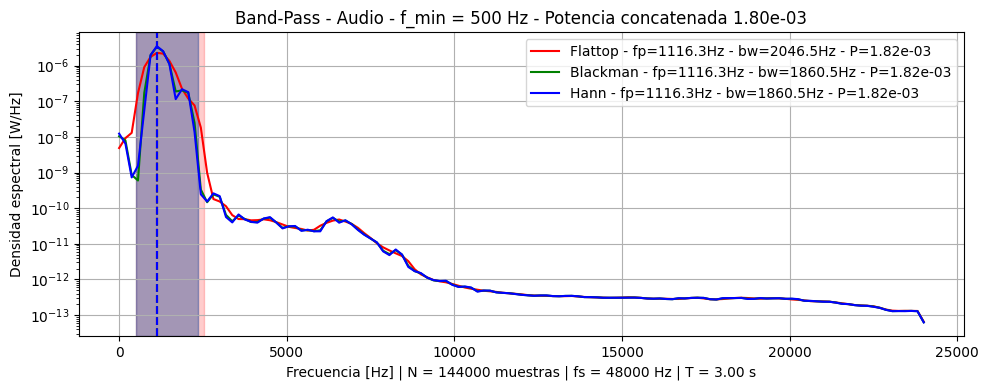

In [15]:
# Pasa bajos
analizar_ventanas(fs=fs_audio, signal=wav_cuca, percentage=0.99, mode='lp', title="Low-Pass - Audio")

# Pasa bandas
analizar_ventanas(fs=fs_audio, signal=wav_cuca, percentage=0.99, mode='bp', title="Band-Pass - Audio")

# Pasa banda desde frecuencia mínima
analizar_ventanas(fs=fs_audio, signal=wav_cuca, percentage=0.99, mode='bp2', f_min=500, title="Band-Pass - Audio - f_min = 500 Hz")

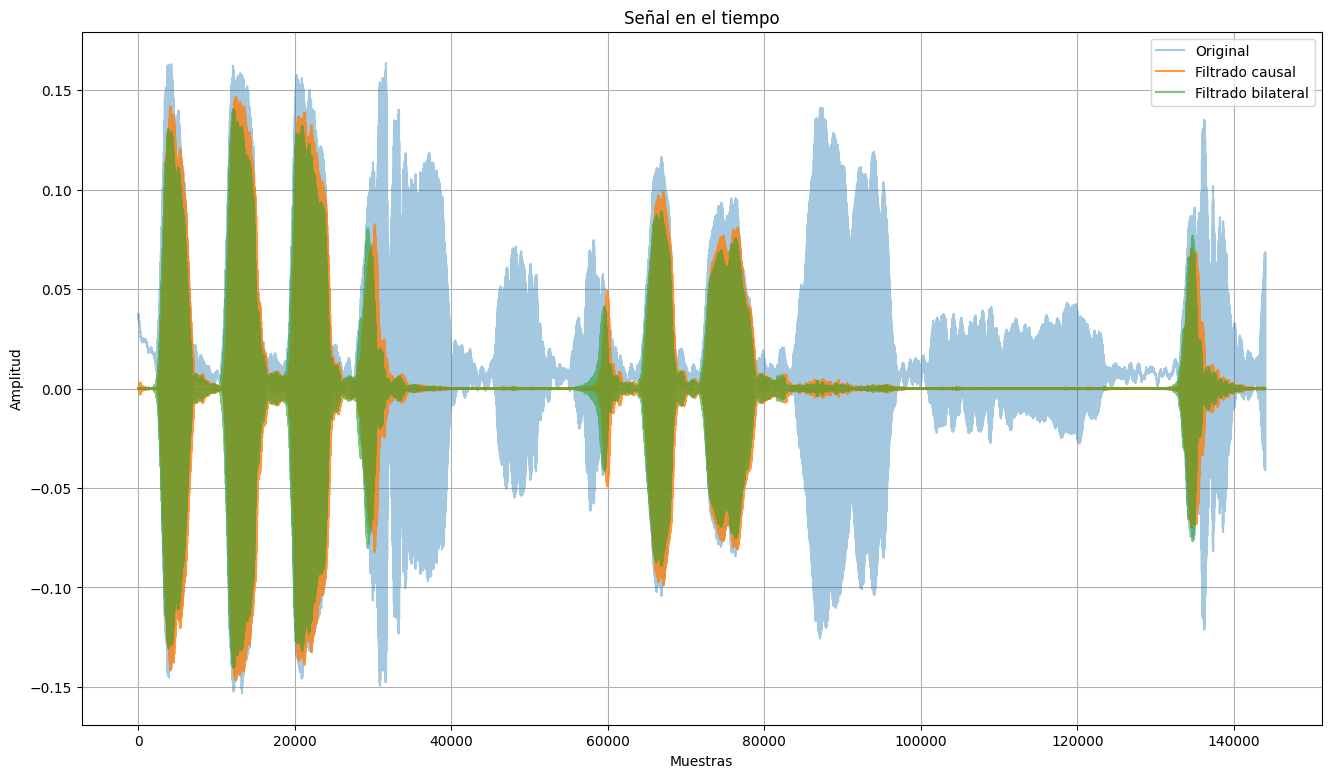

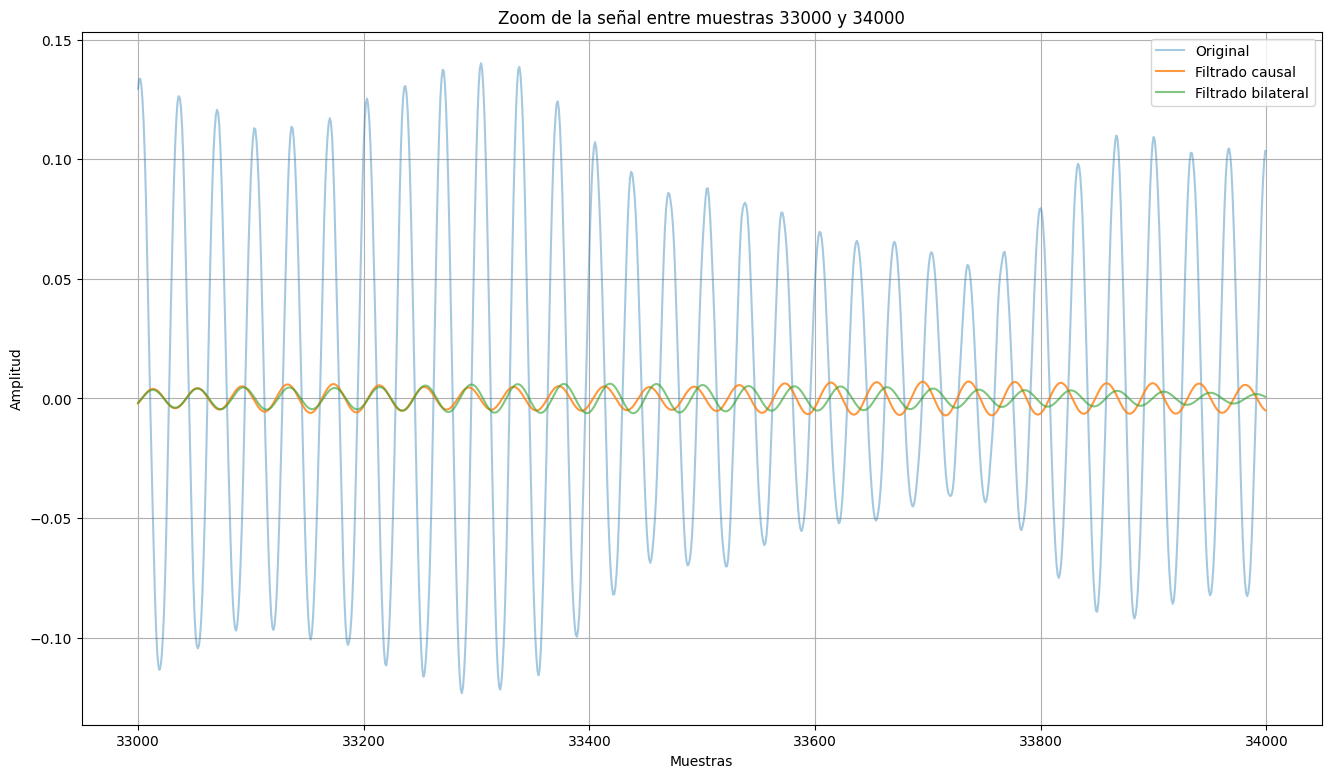

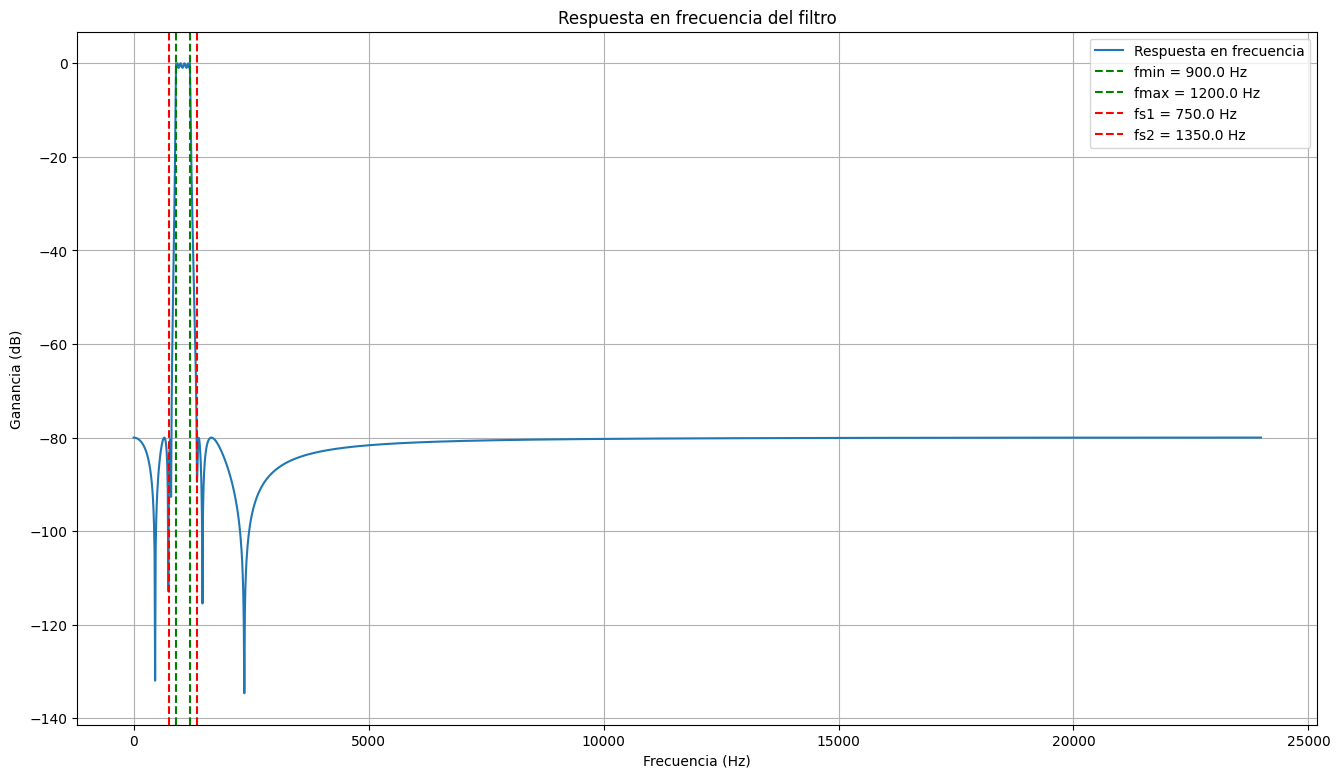

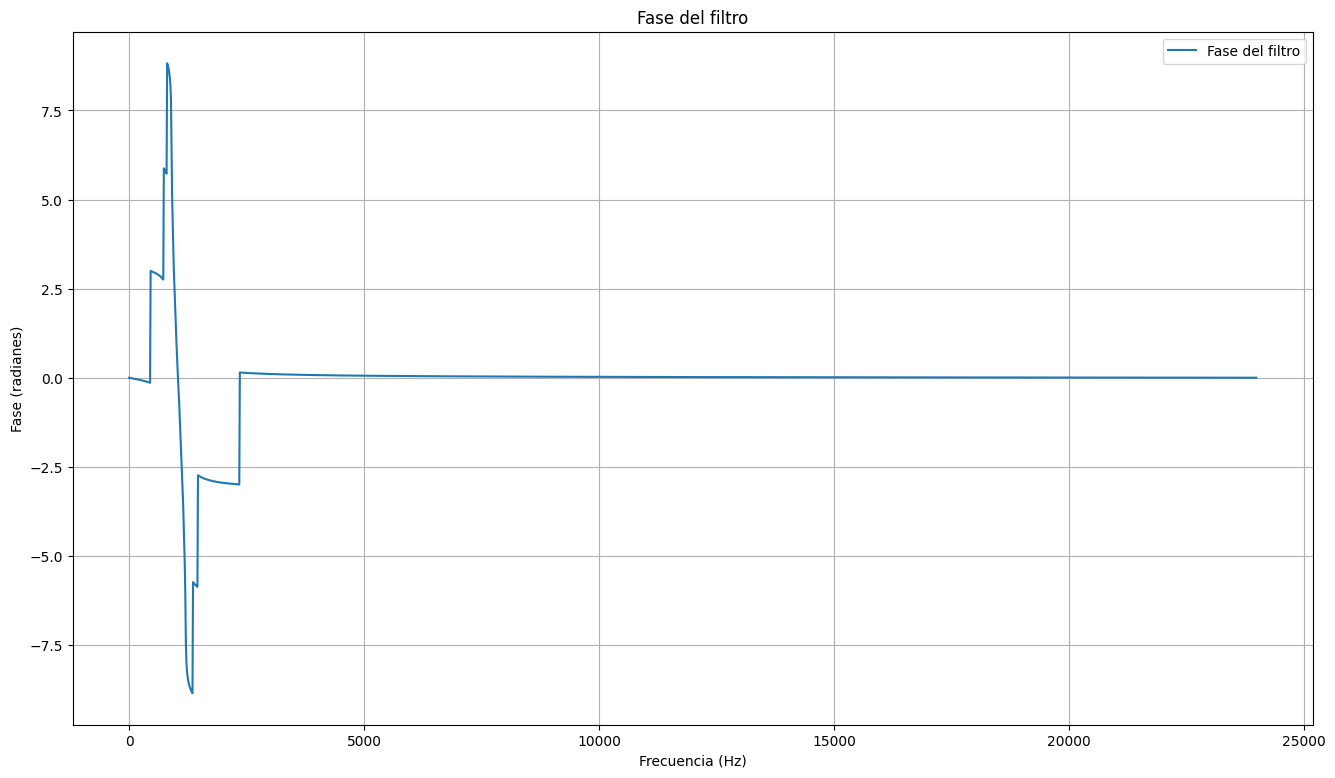

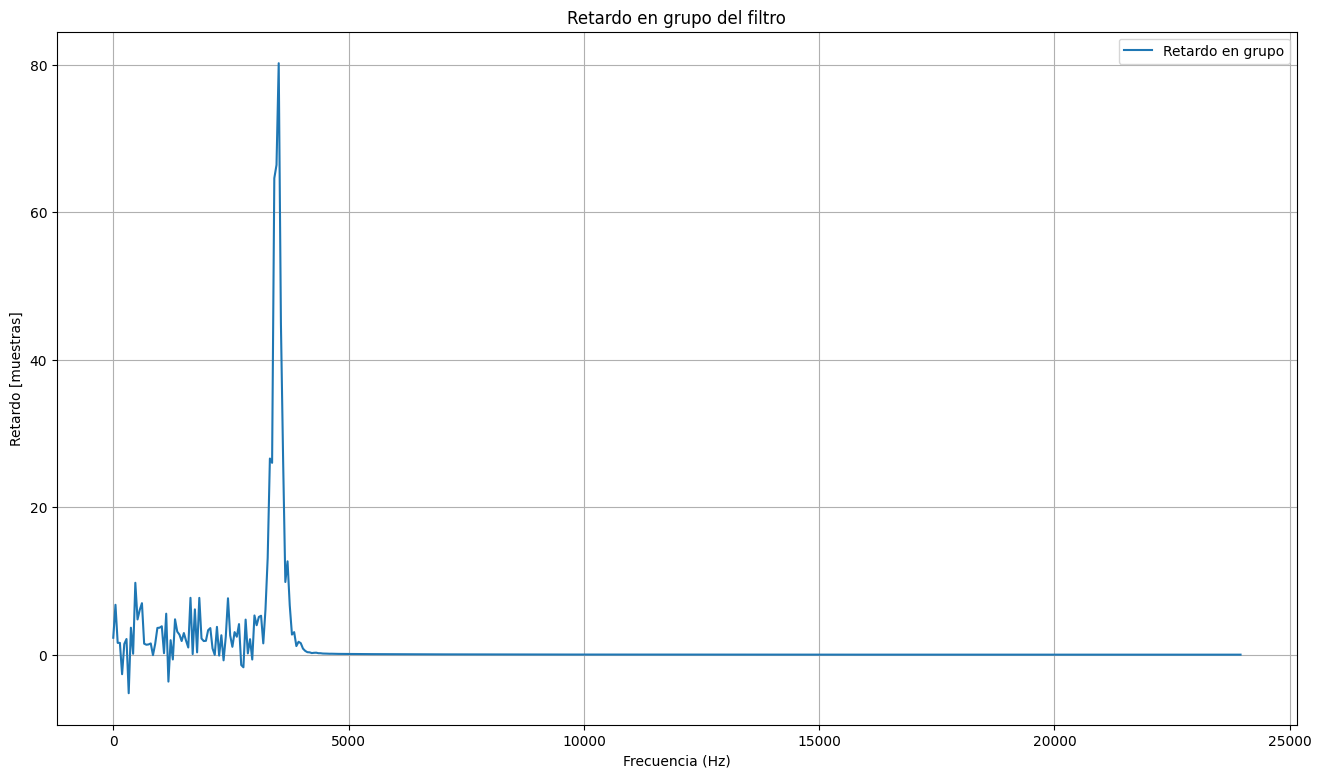

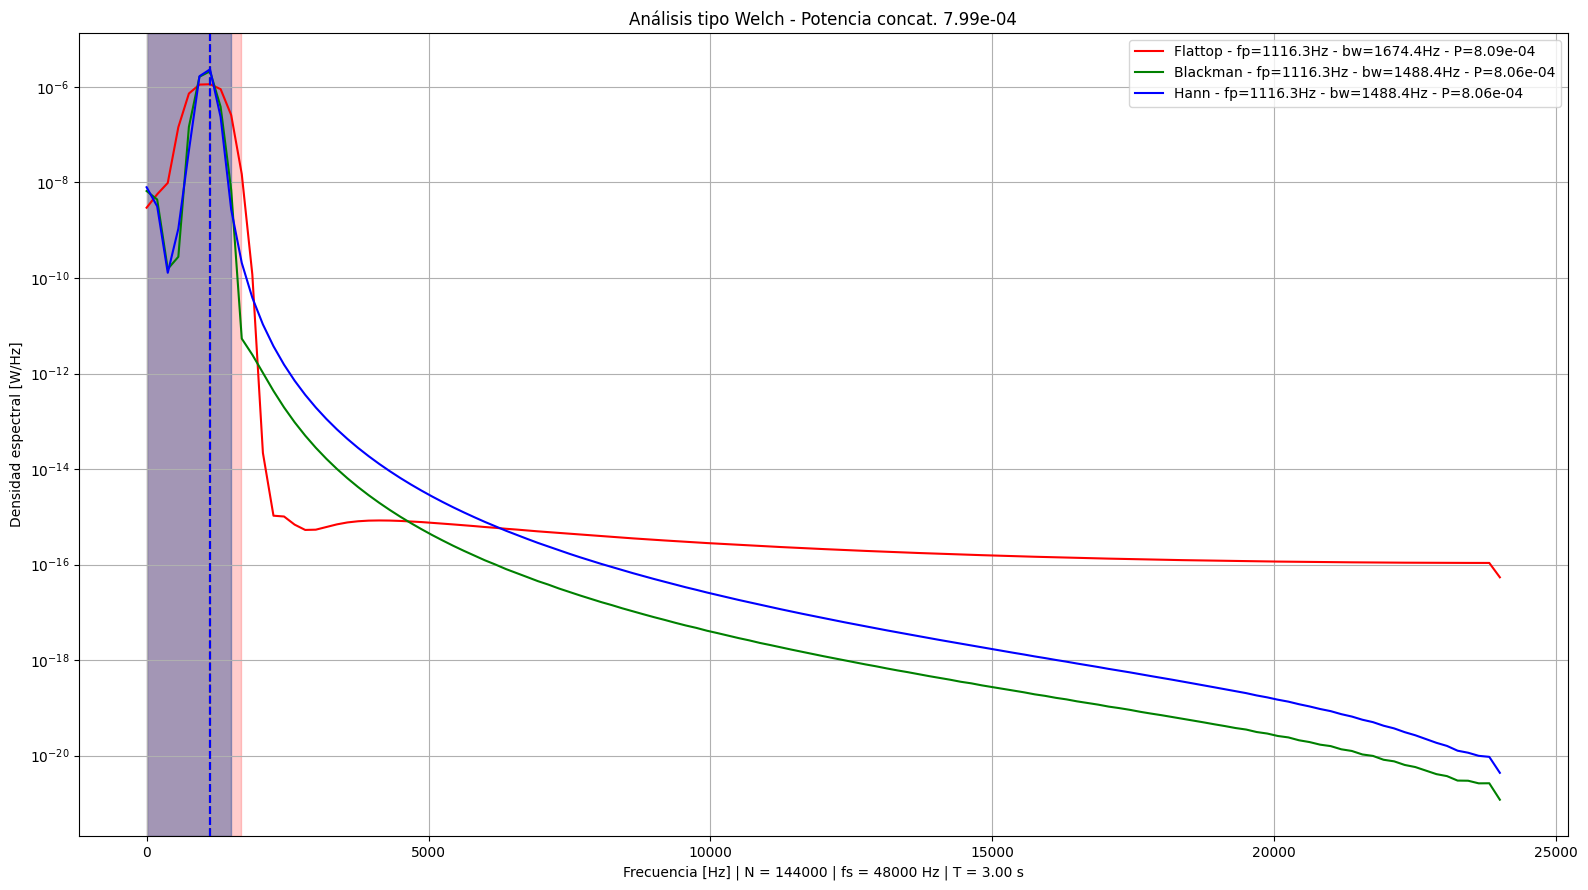

In [184]:
bw = 300        # ancho total del pasabanda
fc_min = 900
Ap = 1
As = 80
tipo = 'ellip'
mode = 'bp'

diseñar_filtrar_plotear(
    fs=fs_audio,
    bw=bw,
    Ap=Ap,
    As=As,
    señal=wav_cuca,
    tipo=tipo,
    mode='bp',
    fc_min=fc_min,
    bi_lateral=True,
    label="cucaracha",
    zoom=[33000, 34000])

### Resultados:
En este caso no se pudo quitar el ruido a "estatica" en el audio sin embargo se pudo suprimir uno de los silvidos.

A continuacion se mostraran de manera iterativa como suenan las señales luego de aplicarles un filtro.


<div style="display: flex; justify-content: space-around">
  <div>
    <p>Cucaracha Bilateral Pb (1kHz - 2k8Hz): </p>
    <audio controls>
      <source src="señales_filtradas/cucaracha_bp_filtfilt.wav" type="audio/wav">
    </audio>
  </div>
  <div>
    <p>Cucaracha Pb (1kHz - 2k8Hz):</p>
    <audio controls>
      <source src="señales_filtradas/cucaracha_bp_sosfilt.wav" type="audio/wav">
    </audio>
  </div>
  <div>
    <p>Audio Original:</p>
    <audio controls>
      <source src="../Mariano_lib/pdstestbench-master/la cucaracha.wav" type="audio/wav">
    </audio>
  </div>
  
</div>

----

#### Silbido:

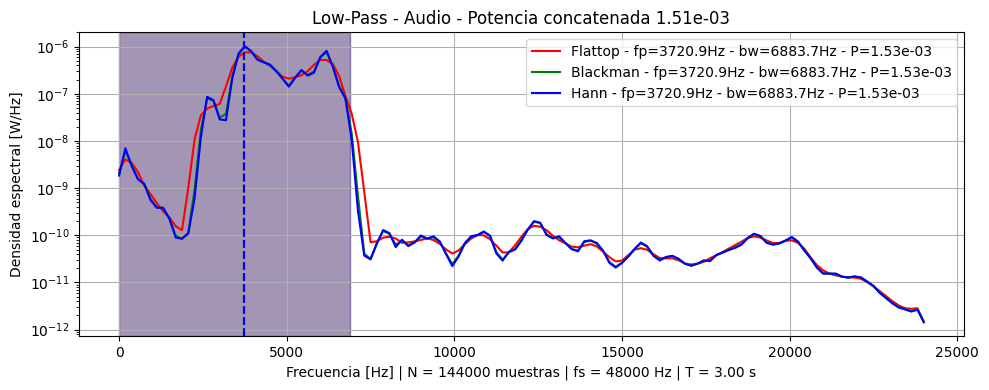

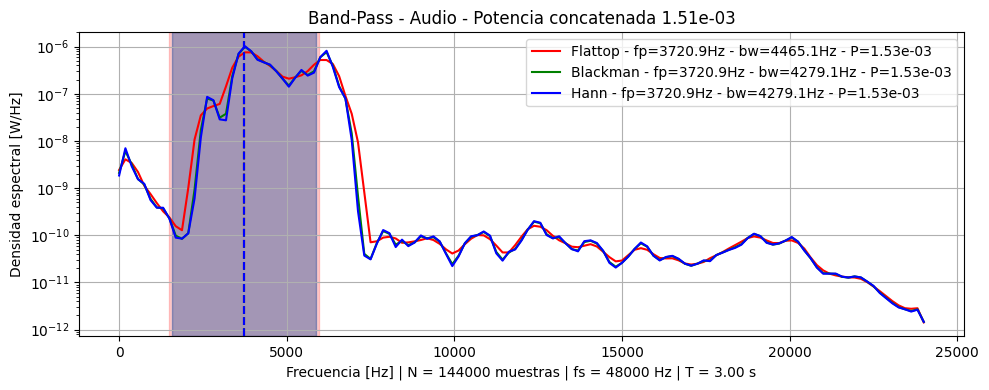

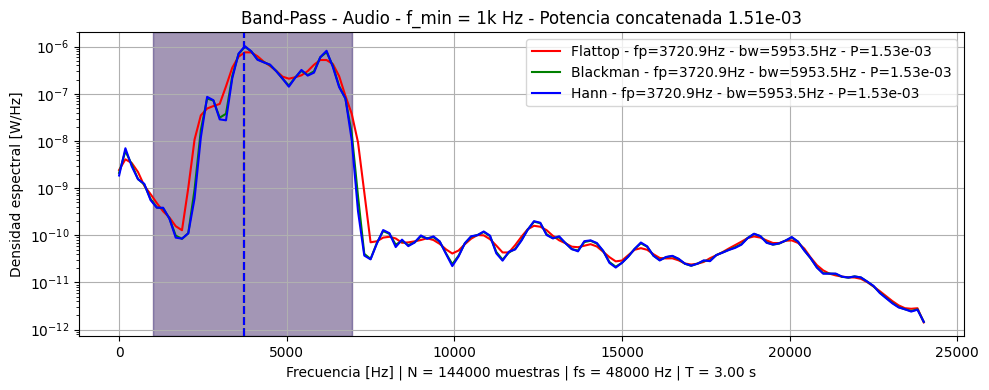

In [167]:
# Pasa bajos
analizar_ventanas(fs=fs_audio, signal=wav_silbido, percentage=0.99, mode='lp', title="Low-Pass - Audio")

# Pasa banda
analizar_ventanas(fs=fs_audio, signal=wav_silbido, percentage=0.99, mode='bp', title="Band-Pass - Audio")

# Pasa banda desde frecuencia mínima
analizar_ventanas(fs=fs_audio, signal=wav_silbido, percentage=0.99, mode='bp2', f_min=1000, title="Band-Pass - Audio - f_min = 1k Hz")

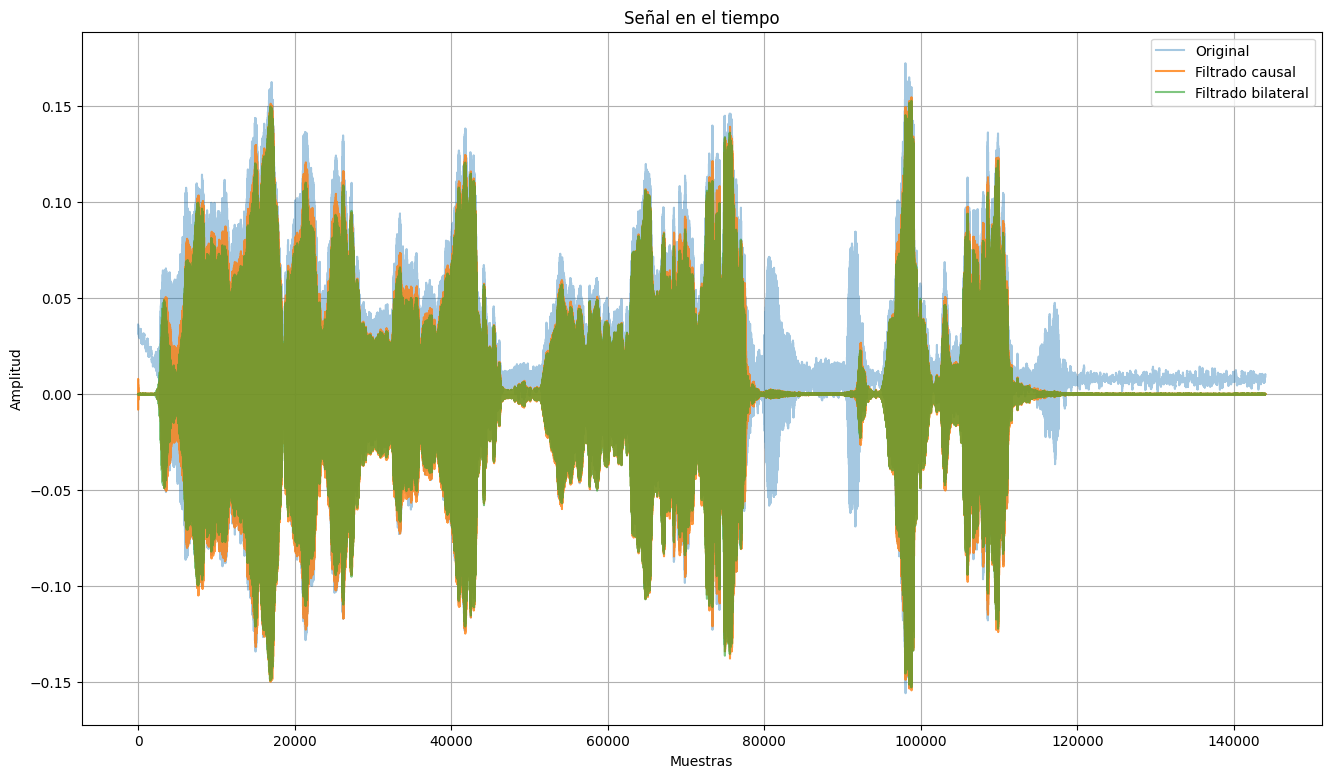

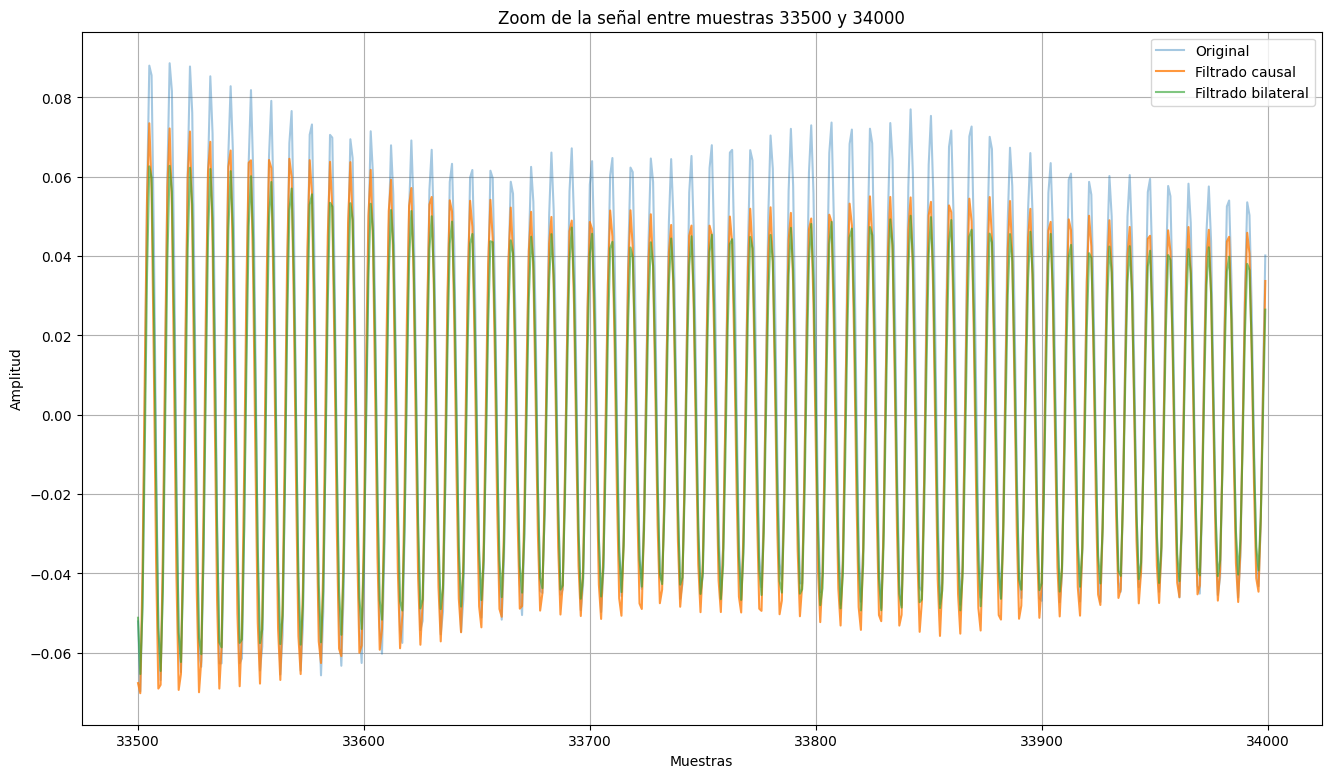

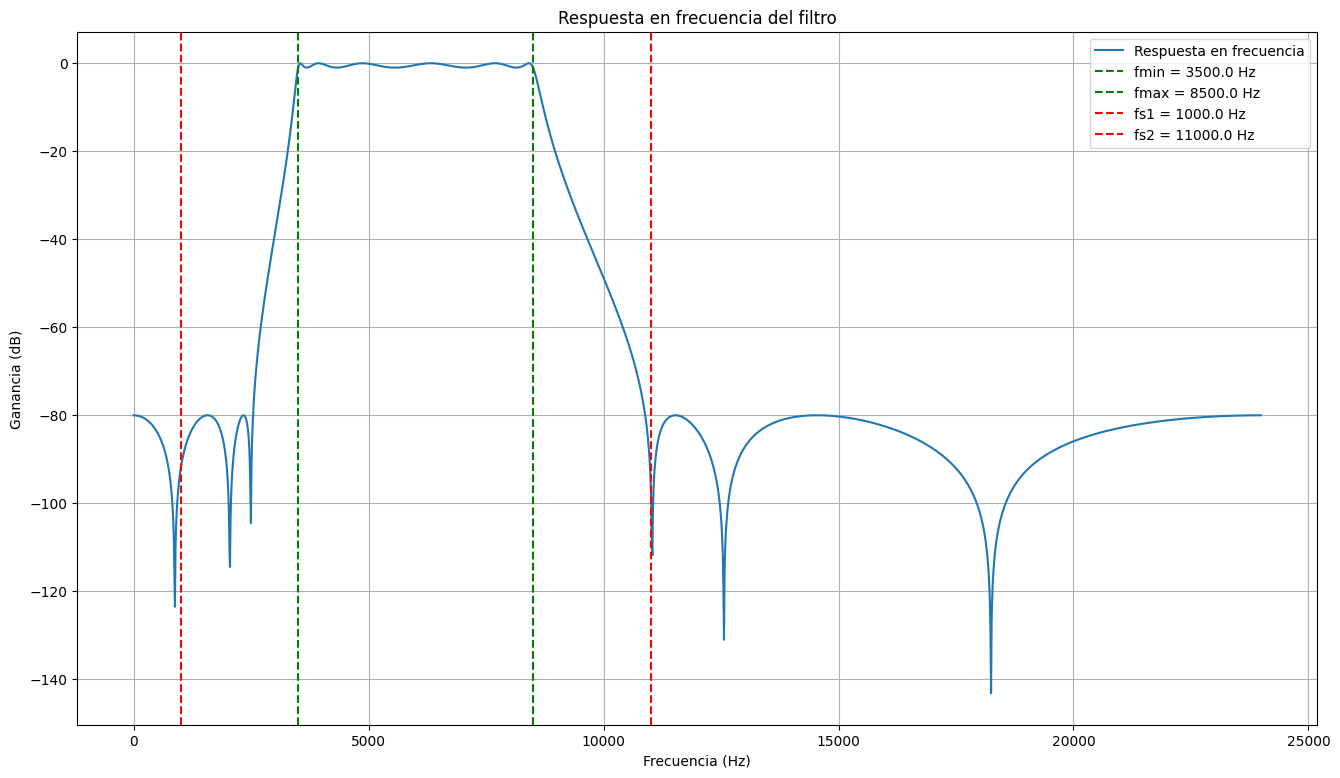

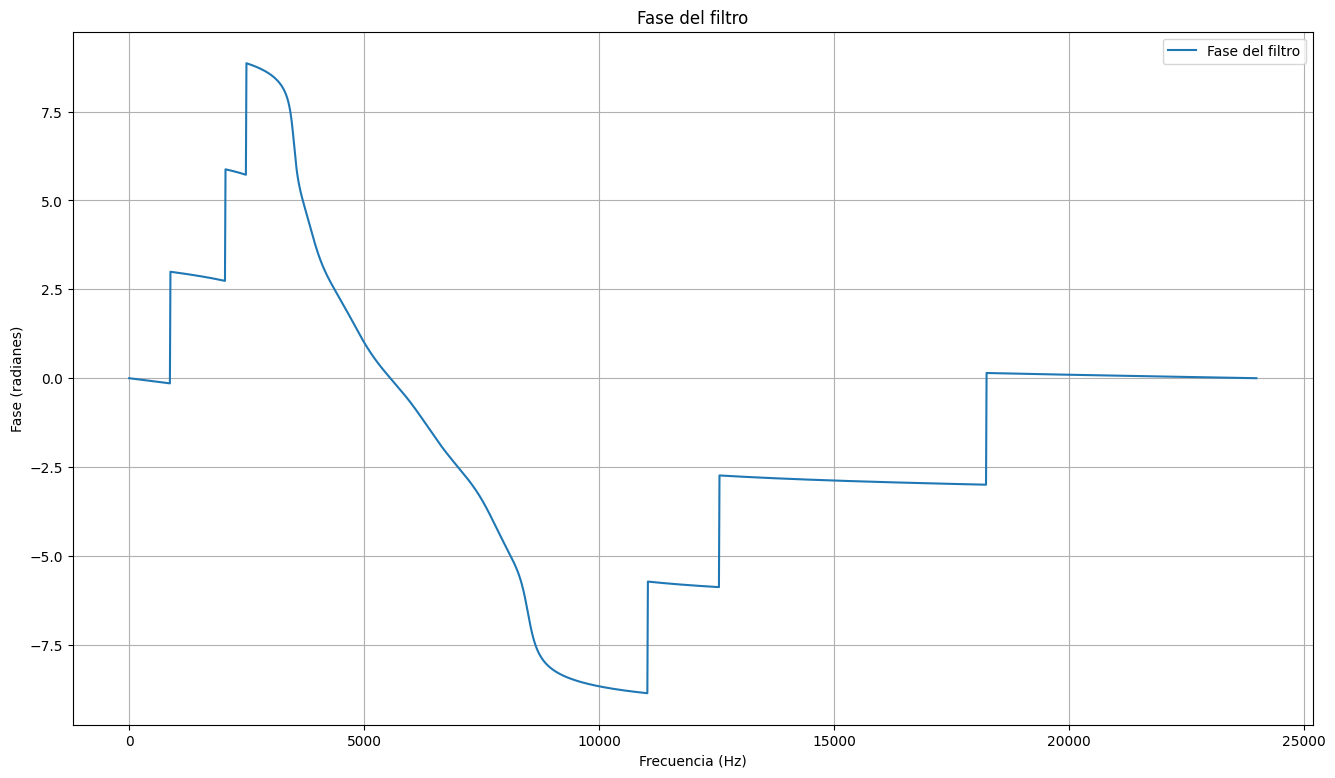

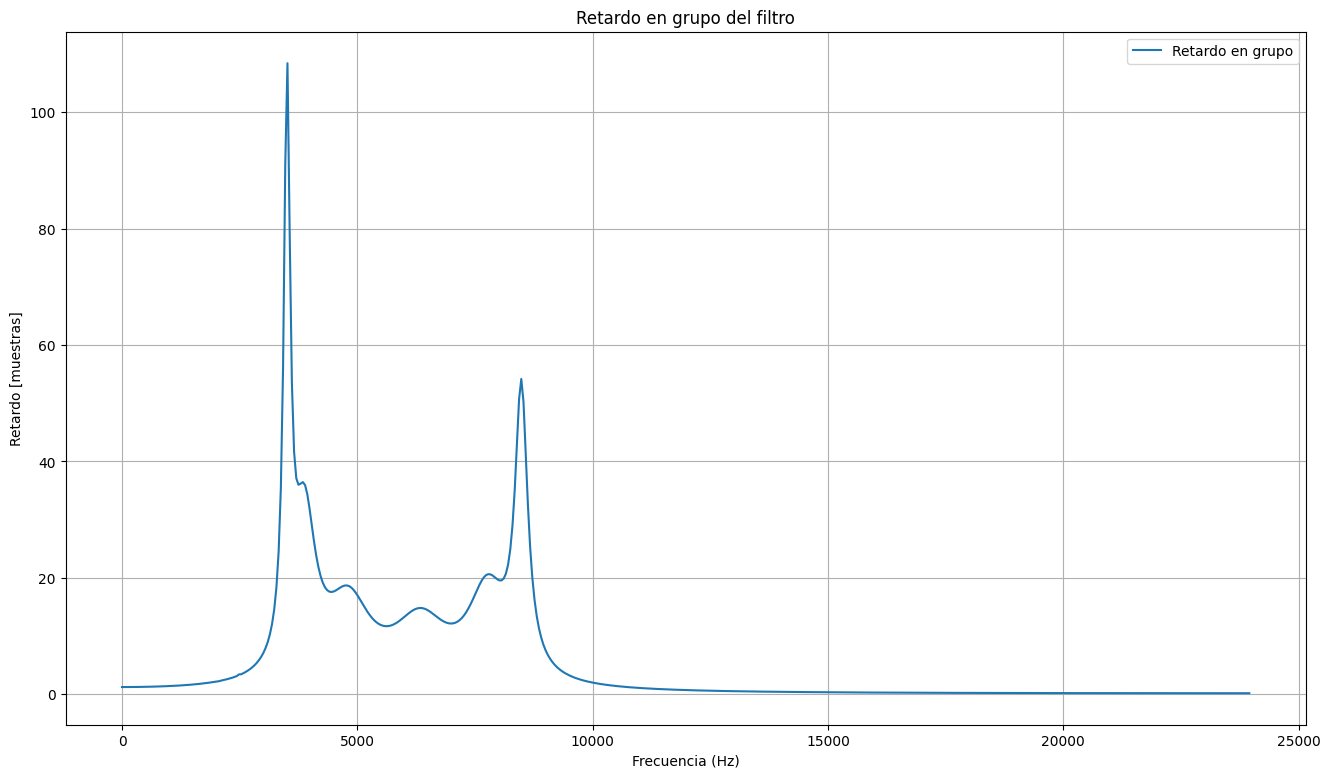

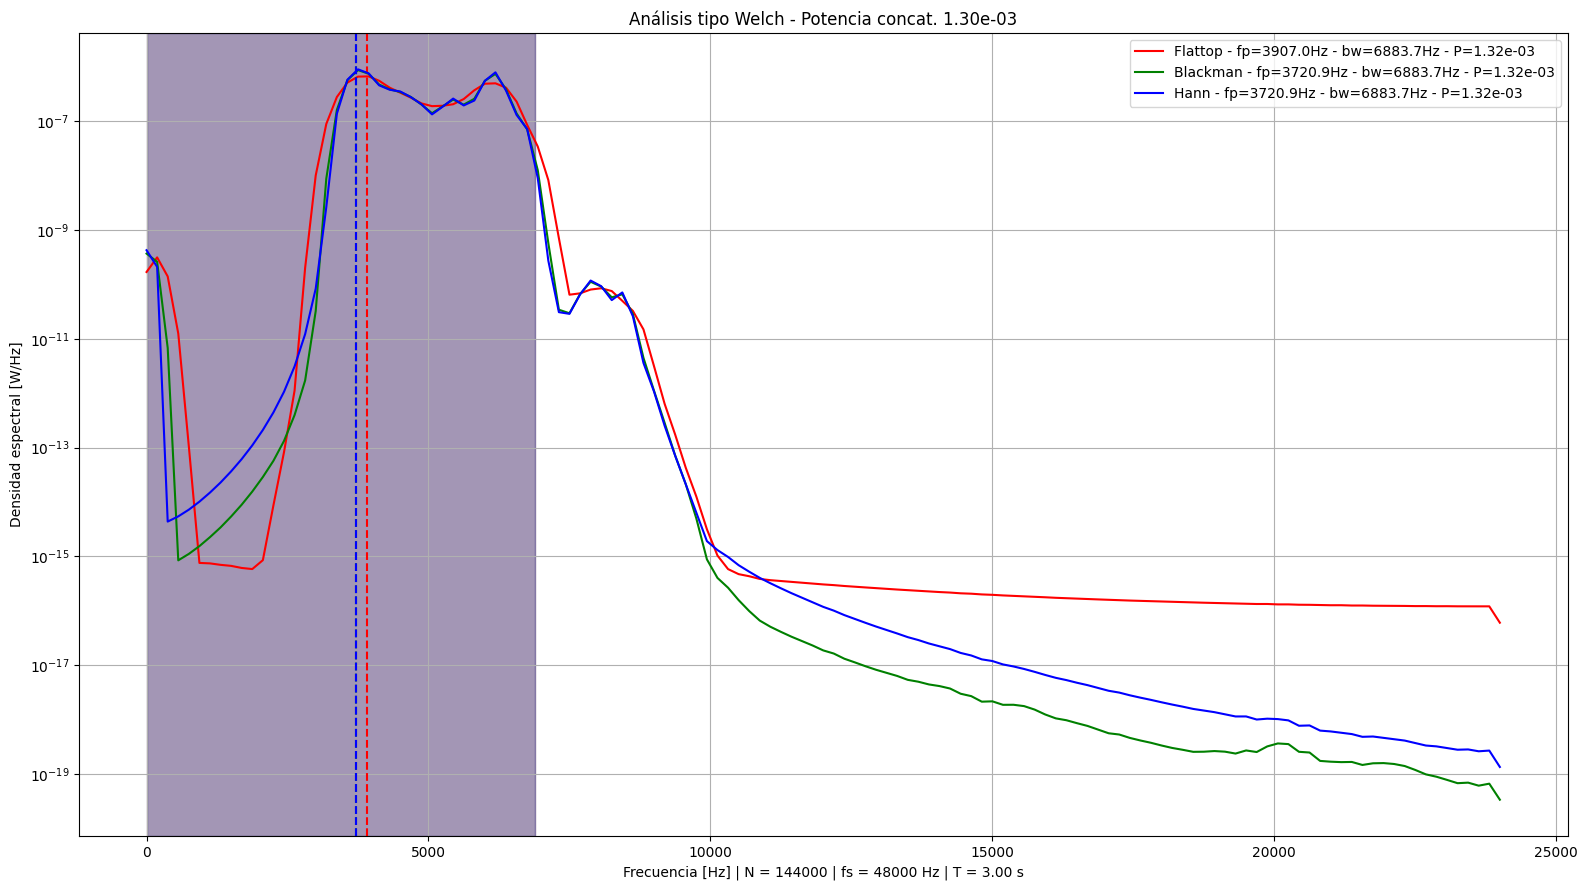

In [183]:
bw = 5000        # ancho total del pasabanda
fc_min = 3500
Ap = 1
As = 80
tipo = 'ellip'
mode = 'bp'

diseñar_filtrar_plotear(
    fs=fs_audio,
    bw=bw,
    Ap=Ap,
    As=As,
    señal=wav_silbido,
    tipo=tipo,
    mode='bp',
    fc_min=fc_min,
    bi_lateral=True,
    label="silbido",
    zoom=[33500, 34000])

### Resultados:
A diferencia del caso anterior en este caso se logro reducir el uno de los ruidos del audio, sin embargo no se pudo reducir el ruido estatico

A continuacion se mostraran de manera iterativa como suenan las señales luego de aplicarles un filtro.


<div style="display: flex; justify-content: space-around">
  <div>
    <p>Cucaracha Bilateral Pb (1kHz - 2k8Hz): </p>
    <audio controls>
      <source src="señales_filtradas/silbido_bp_filtfilt.wav" type="audio/wav">
    </audio>
  </div>
  <div>
    <p>Cucaracha Pb (1kHz - 2k8Hz):</p>
    <audio controls>
      <source src="señales_filtradas/silbido_bp_sosfilt.wav" type="audio/wav">
    </audio>
  </div>
  <div>
    <p>Audio Original:</p>
    <audio controls>
      <source src="../Mariano_lib/pdstestbench-master/silbido.wav" type="audio/wav">
    </audio>
  </div>
  
</div>

----

#### PSD:

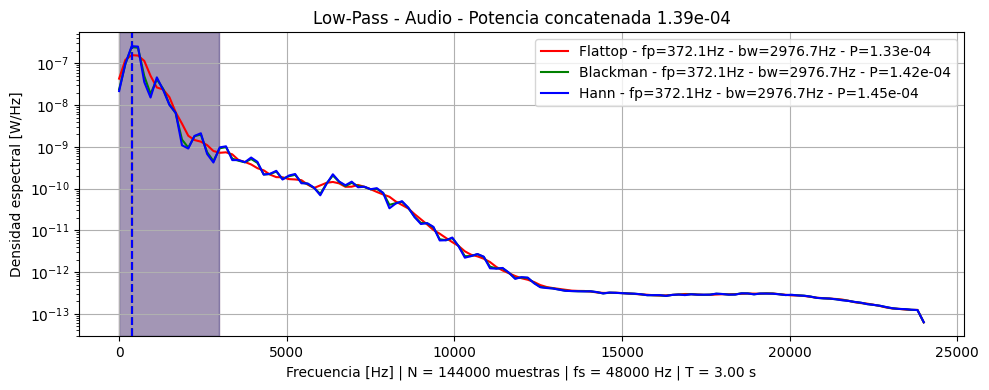

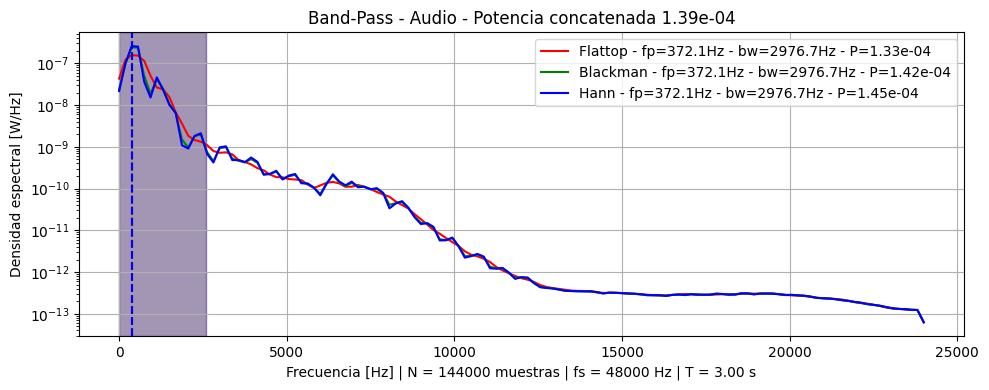

In [86]:
# Pasa bajos
analizar_ventanas(fs=fs_audio, signal=wav_psd, percentage=0.99, mode='lp', title="Low-Pass - Audio")

# Pasa banda
analizar_ventanas(fs=fs_audio, signal=wav_psd, percentage=0.99, mode='bp', title="Band-Pass - Audio")

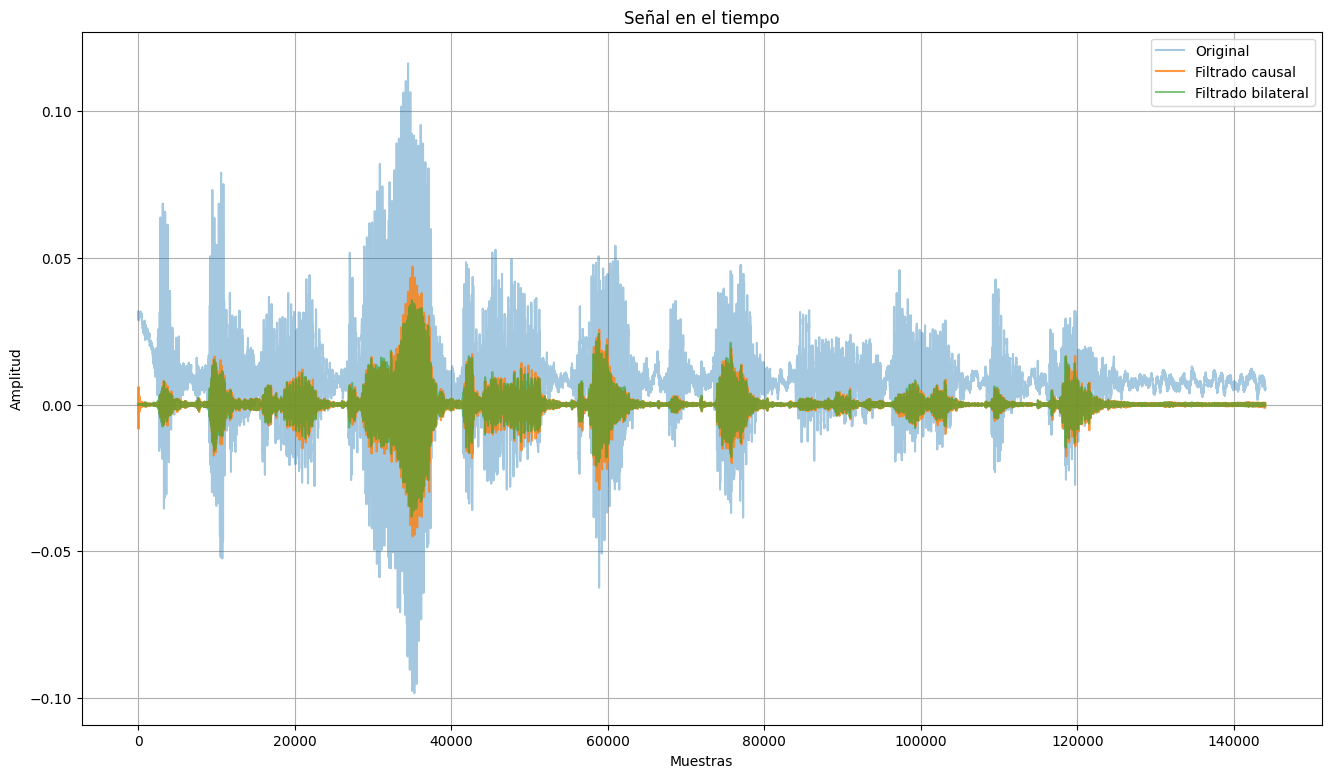

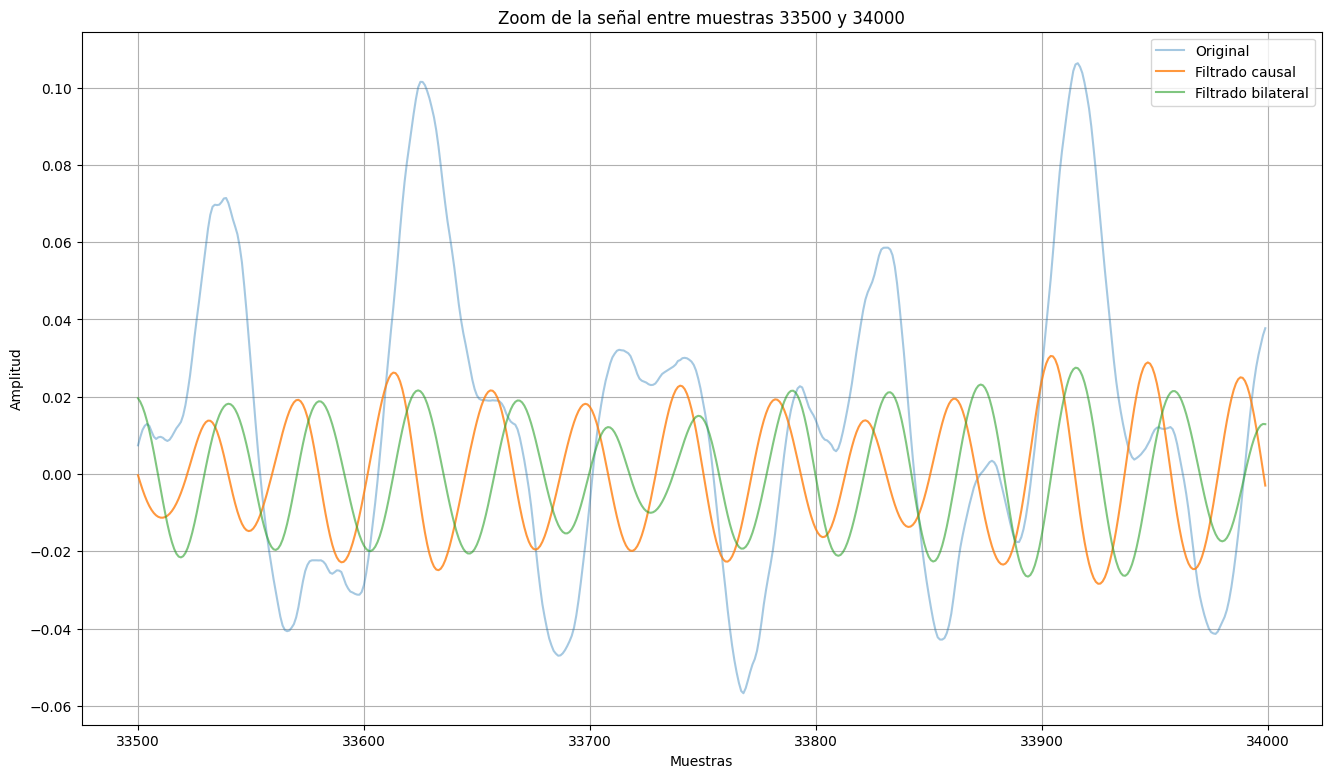

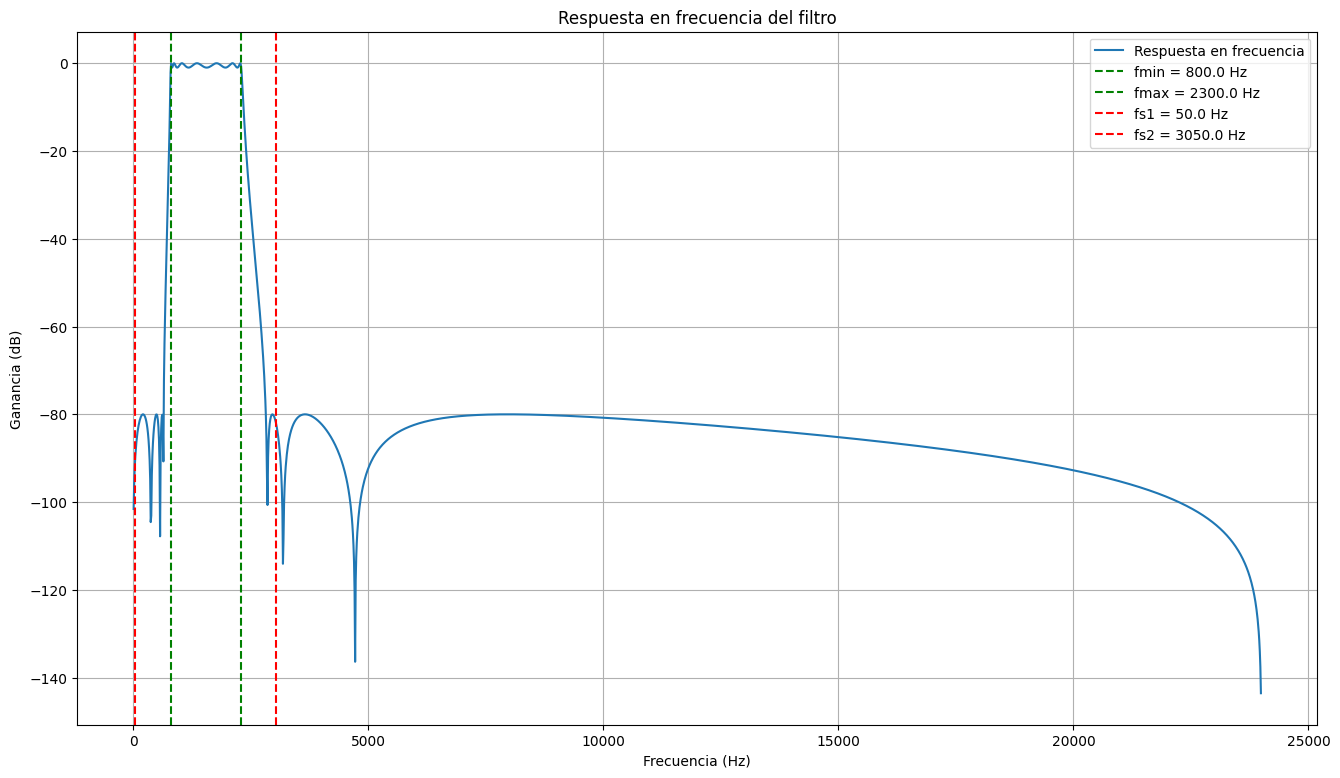

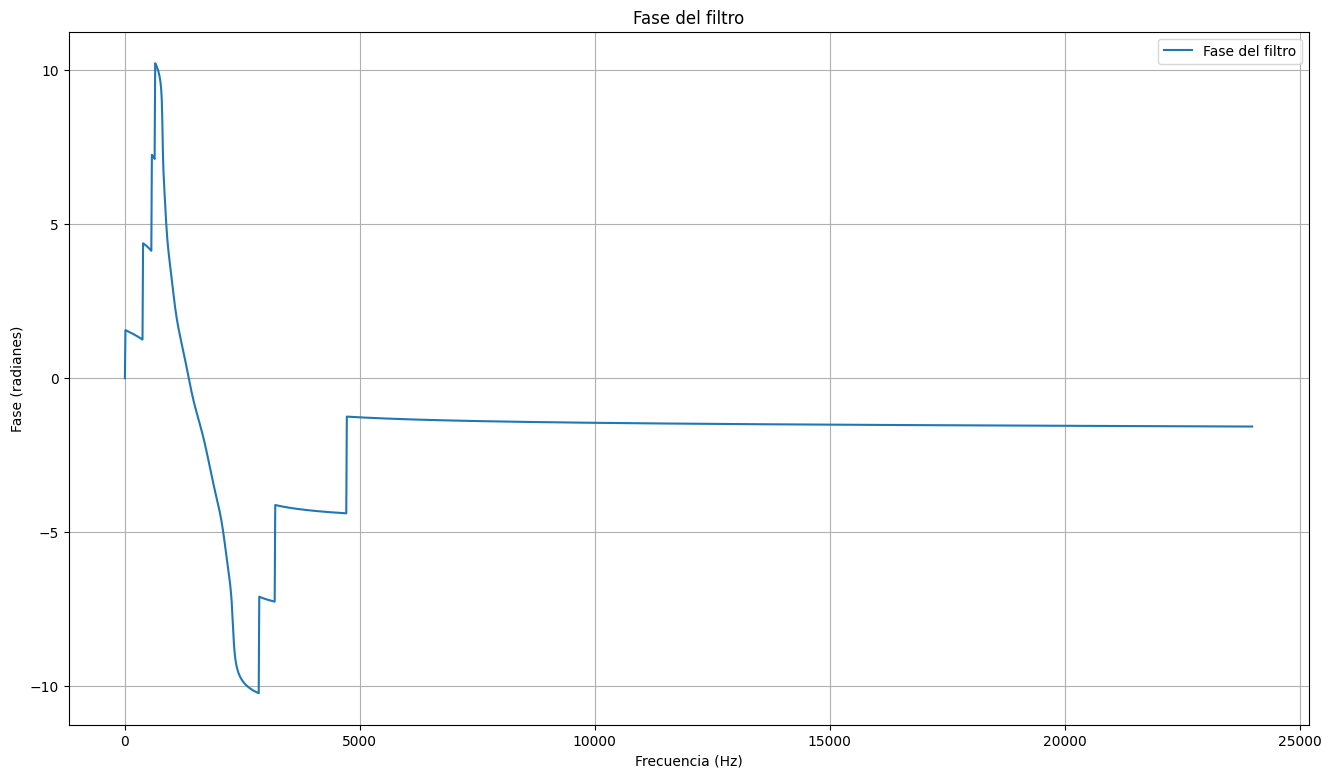

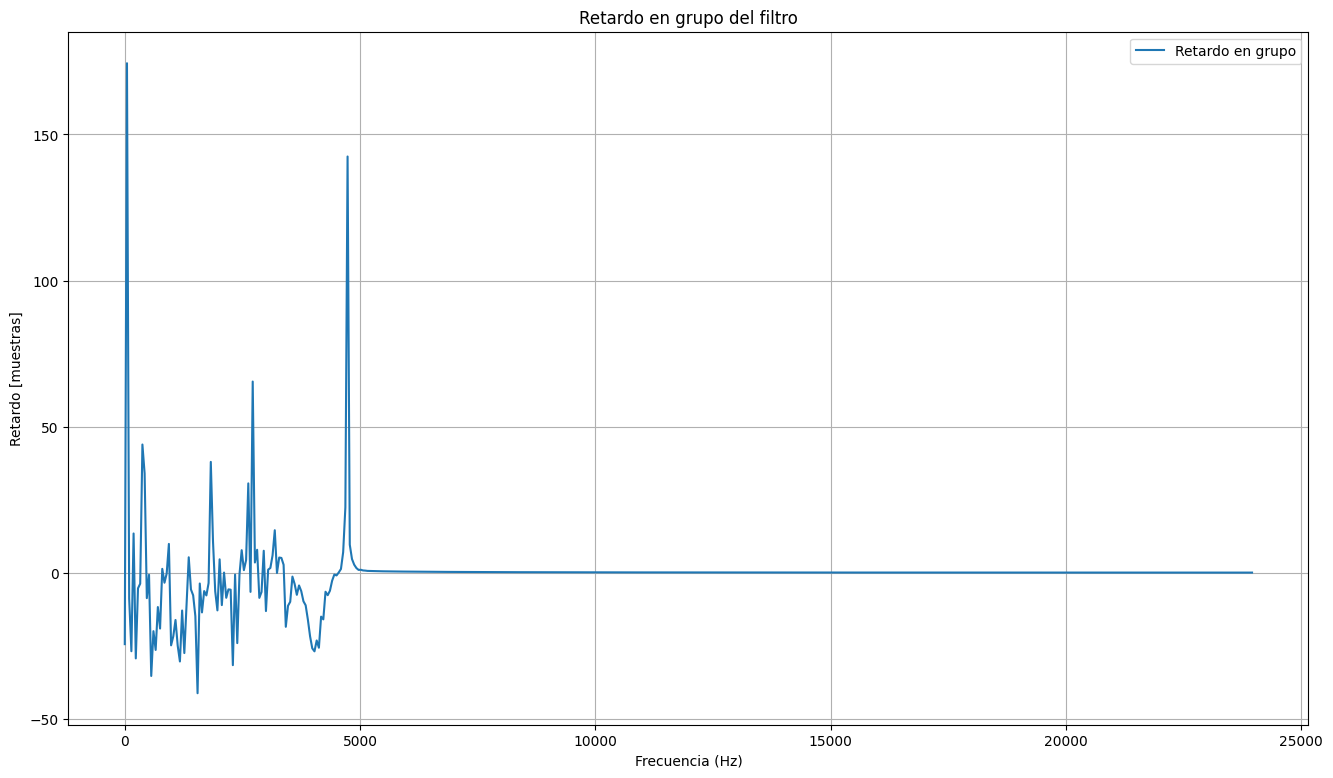

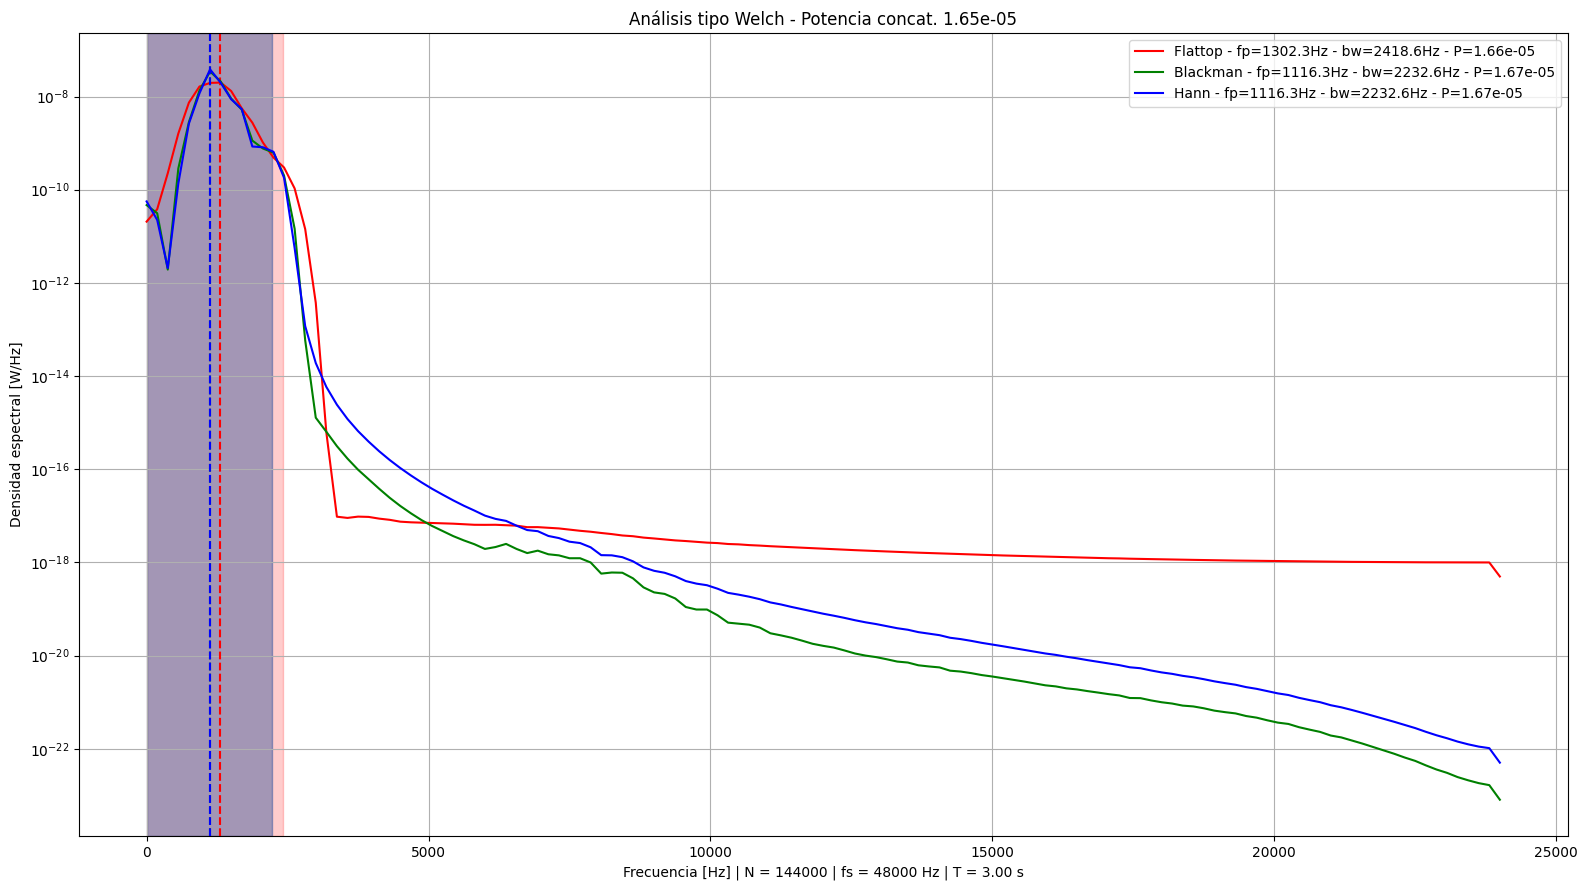

In [182]:
bw = 1500        # ancho total del pasabanda
fc_min = 800
Ap = 1
As = 80
tipo = 'ellip'
mode = 'bp'

diseñar_filtrar_plotear(
    fs=fs_audio,
    bw=bw,
    Ap=Ap,
    As=As,
    señal=wav_psd,
    tipo=tipo,
    mode='bp',
    fc_min=fc_min,
    bi_lateral=True,
    label="PSD",
    zoom=[33500, 34000])

### Resultados:
En este caso se logro reducir el ruido en el audio, sin embargo se atenuo la señal que se queria enviar.

A continuacion se mostraran de manera iterativa como suenan las señales luego de aplicarles un filtro.


<div style="display: flex; justify-content: space-around">
  <div>
    <p>Cucaracha Bilateral Pb (1kHz - 2k8Hz): </p>
    <audio controls>
      <source src="señales_filtradas/PSD_bp_filtfilt.wav" type="audio/wav">
    </audio>
  </div>
  <div>
    <p>Cucaracha Pb (1kHz - 2k8Hz):</p>
    <audio controls>
      <source src="señales_filtradas/PSD_bp_sosfilt.wav" type="audio/wav">
    </audio>
  </div>
  <div>
    <p>Audio Original:</p>
    <audio controls>
      <source src="../Mariano_lib/pdstestbench-master/prueba psd.wav" type="audio/wav">
    </audio>
  </div>
  
</div>

----

---
### Resultados:
A continuacion se brindaran una tabla de resultados en la cual se podra observar el ancho de banda necesaria para obtener el 99% de la energia de la señal para distitas ventanas y metododos apra acotar la señal.

<div align="center">
<table style="border-collapse: collapse; text-align: center; font-family: sans-serif; font-size: 14px; color: #000000; background-color: #f0f0f0;">

  <!-- Cabecera principal -->
  <tr style="background-color: #d0d0d0;">
    <th rowspan="2" style="padding: 8px;"></th>
    <th colspan="3">ECG</th>
    <th colspan="3">PPG</th>
    <th colspan="3">Cucaracha</th>
    <th colspan="3">Silbido</th>
    <th colspan="3">PSD</th>
  </tr>

  <!-- Ventanas -->
  <tr style="background-color: #e0e0e0;">
    <td>Hann</td>
    <td>Blackman</td>
    <td>Flattop</td>
    <td>Hann</td>
    <td>Blackman</td>
    <td>Flattop</td>
    <td>Hann</td>
    <td>Blackman</td>
    <td>Flattop</td>
    <td>Hann</td>
    <td>Blackman</td>
    <td>Flattop</td>
    <td>Hann</td>
    <td>Blackman</td>
    <td>Flattop</td>
  </tr>

  <!-- fp -->
  <tr>
    <td style="text-align: left; padding-left: 10px;">fp [Hz]</td>
    <td>3.9</td><td>3.9</td><td>7.8</td>
    <td>1.6</td><td>1.6</td><td>1.6</td>
    <td>1166</td><td>1166</td><td>1166</td>
    <td>3720</td><td>3720</td><td>3720</td>
    <td>372</td><td>372</td><td>372</td>
  </tr>
  
  <!-- BW Lp-->
  <tr>
    <td style="text-align: left; padding-left: 10px;">BW Lp [Hz]</td>
    <td>38.8</td><td>38.8</td><td>42.6</td>
    <td>7.8</td><td>7.8</td><td>9.3</td>
    <td>2232</td><td>2232</td><td>2232</td>
    <td>6883</td><td>6883</td><td>6883</td>
    <td>2976</td><td>2976</td><td>2976</td>
  </tr>

  <!-- BW Pb1 -->
  <tr>
    <td style="text-align: left; padding-left: 10px;">BW PB1 [Hz]</td>
    <td>38.8</td><td>38.8</td><td>42.6</td>
    <td>7.8</td><td>7.8</td><td>9.3</td>
    <td>1302</td><td>1488</td><td>1860</td>
    <td>4279</td><td>4279</td><td>4465</td>
    <td>2976</td><td>2976</td><td>2976</td>
  </tr>

  <!-- BW Pb2 -->
  <tr>
    <td style="text-align: left; padding-left: 10px;">PB2 [Hz]</td>
    <td>X</td><td>X</td>X<td>X</td>
    <td>X</td><td>X</td><td>X</td>
    <td>1860</td><td>1860</td><td>2046</td>
    <td>5953</td><td>5953</td><td>5953</td>
    <td>X</td><td>X</td><td>X</td>
  </tr>

</table>
</div>